<a href="https://colab.research.google.com/github/Group4-s2025/DATA-6550-Algorithms/blob/main/Module_4_Project_Group_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Housing Discrimination and Algorithmic Bias
## Module 4: Algorithmic Bias
### By: Savi Alwis, Moses Kipkemboi, Muqtasid Qureshi, Pallavi Suram

In [87]:
# Load libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [88]:
# Load dataset
url = "https://raw.githubusercontent.com/Group4-s2025/DATA-6550-Algorithms/refs/heads/main/Data/mortgage_covenant_data.csv"
df = pd.read_csv(url)

In [89]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100931 entries, 0 to 100930
Data columns (total 14 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   activity_year                      100931 non-null  int64  
 1   census_tract                       99915 non-null   float64
 2   derived_race                       100931 non-null  object 
 3   action_taken                       100931 non-null  int64  
 4   loan_amount                        100931 non-null  float64
 5   property_value                     83491 non-null   float64
 6   income                             88200 non-null   float64
 7   interest_rate                      78125 non-null   float64
 8   tract_minority_population_percent  100931 non-null  float64
 9   tract_to_msa_income_percentage     100931 non-null  float64
 10  denial_reason-1                    100931 non-null  int64  
 11  covenant_count                     1009

In [90]:
df['covenant_density'].value_counts()

,count
covenant_density,
Low (1-50),4537
Very High (>200),3140
Medium (51-100),1772
High (101-200),1720


In [91]:
df.head()

,activity_year,census_tract,derived_race,action_taken,loan_amount,property_value,income,interest_rate,tract_minority_population_percent,tract_to_msa_income_percentage,denial_reason-1,covenant_count,was_approved,covenant_density
0,2023,2.703706e+10,Race Not Available,6,185000.0,195000.0,NaN,6.125,40.37,73.48,10,0.0,False,NaN
1,2023,2.714103e+10,Race Not Available,6,375000.0,385000.0,NaN,6.625,10.64,121.26,10,0.0,False,NaN
2,2023,2.702395e+10,Race Not Available,6,105000.0,105000.0,NaN,6.125,8.92,90.13,10,0.0,False,NaN
3,2023,2.717110e+10,Race Not Available,6,285000.0,285000.0,NaN,6.750,13.27,104.37,10,0.0,False,NaN
4,2023,2.715948e+10,Race Not Available,6,175000.0,175000.0,NaN,6.875,5.87,82.22,10,0.0,False,NaN


### Data Cleansing

In [92]:
# Remove null/missing values
df = df.dropna(subset=['property_value', 'income', 'interest_rate', 'census_tract', 'covenant_density'])
df = df[df['derived_race'] != 'Race Not Available']

In [93]:
# Convert 'was_was_approved' from boolean to int
df['was_approved'] = df['was_approved'].astype(int)

In [94]:
# Display updated data
display(df.info())
display(df.head())

<class 'pandas.core.frame.DataFrame'>
Index: 6704 entries, 363 to 100922
Data columns (total 14 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   activity_year                      6704 non-null   int64  
 1   census_tract                       6704 non-null   float64
 2   derived_race                       6704 non-null   object 
 3   action_taken                       6704 non-null   int64  
 4   loan_amount                        6704 non-null   float64
 5   property_value                     6704 non-null   float64
 6   income                             6704 non-null   float64
 7   interest_rate                      6704 non-null   float64
 8   tract_minority_population_percent  6704 non-null   float64
 9   tract_to_msa_income_percentage     6704 non-null   float64
 10  denial_reason-1                    6704 non-null   int64  
 11  covenant_count                     6704 non-null   float6

None

,activity_year,census_tract,derived_race,action_taken,loan_amount,property_value,income,interest_rate,tract_minority_population_percent,tract_to_msa_income_percentage,denial_reason-1,covenant_count,was_approved,covenant_density
363,2023,2.705302e+10,White,1,315000.0,325000.0,68.0,6.375,62.20,69.94,10,82.0,1,Medium (51-100)
369,2023,2.705303e+10,Asian,1,365000.0,495000.0,392.0,7.625,12.92,108.89,10,292.0,1,Very High (>200)
373,2023,2.705303e+10,White,1,195000.0,225000.0,53.0,6.875,47.47,77.17,10,87.0,1,Medium (51-100)
403,2023,2.705303e+10,White,1,475000.0,685000.0,221.0,7.250,25.75,106.27,10,119.0,1,High (101-200)
616,2023,2.705303e+10,White,1,335000.0,415000.0,120.0,6.125,12.84,159.62,10,2.0,1,Low (1-50)


In [95]:
# Show count of each race in the 'derived_race' column
race_counts = df['derived_race'].value_counts()
display(race_counts)

# Replace 'Black or African American' with 'Black'
df['derived_race'] = df['derived_race'].replace('Black or African American', 'Black')

# Combine 'American Indian or Alaska Native' and 'Native Hawaiian or Other Pacific Islander' with 'Native American/Pacific Islander'
df['derived_race'] = df['derived_race'].replace({
    'American Indian or Alaska Native': 'Native American/Pacific Islander',
    'Native Hawaiian or Other Pacific Islander': 'Native American/Pacific Islander'
})

# Display the counts
display(race_counts)

,count
derived_race,
White,5434
Black or African American,483
Asian,413
Joint,297
American Indian or Alaska Native,57
2 or more minority races,12
Native Hawaiian or Other Pacific Islander,8


,count
derived_race,
White,5434
Black or African American,483
Asian,413
Joint,297
American Indian or Alaska Native,57
2 or more minority races,12
Native Hawaiian or Other Pacific Islander,8


#### Initial Analysis

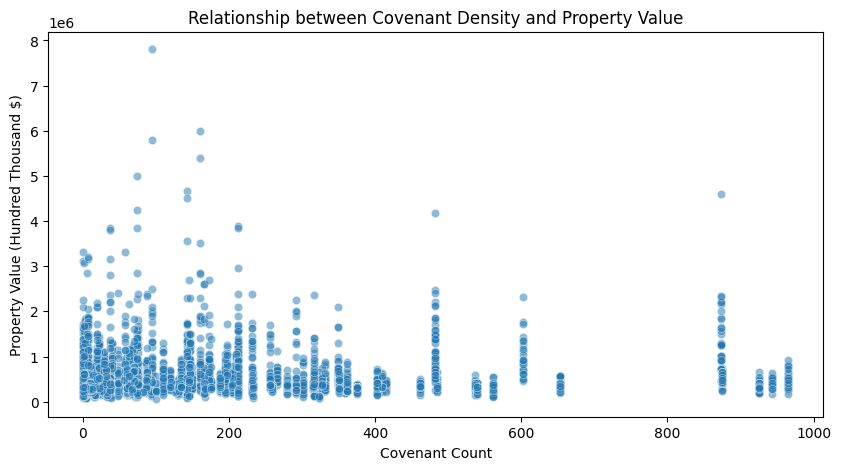

In [96]:
plt.figure(figsize=(10, 5))
sns.scatterplot(data=df, x='covenant_count', y='property_value', alpha = 0.5)
plt.title("Relationship between Covenant Density and Property Value")
plt.xlabel("Covenant Count")
plt.ylabel("Property Value (Hundred Thousand $)")
#plt.yticks([0, 100000, 200000, 300000, 400000, 500000, 600000, 700000, 800000])
plt.show()

<ipython-input-97-68485f14b503>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=approval_rate.index, y=approval_rate.values, ax=axes[0], palette='Greens')
<ipython-input-97-68485f14b503>:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=disapproval_rate.index, y=disapproval_rate.values, ax=axes[1], palette='Reds')


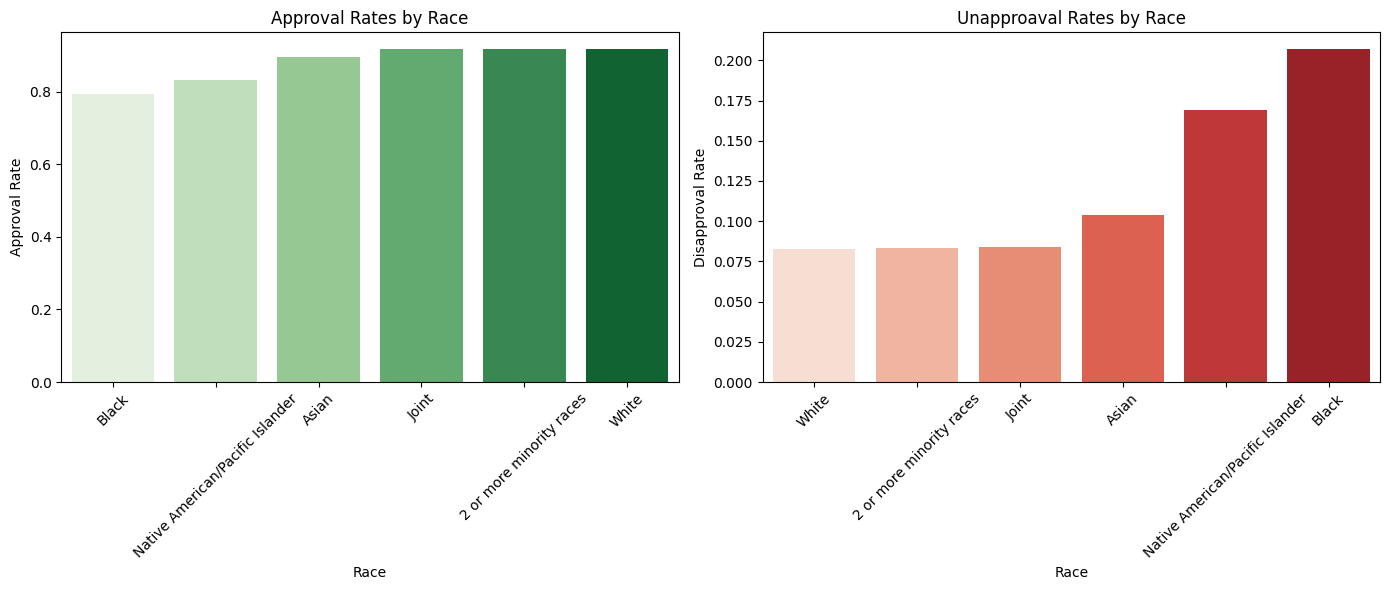

In [97]:
# Calculate the approval and disapproval rates by race
df_ratio = df.groupby(['derived_race', 'was_approved']).size().unstack().apply(lambda x: x / x.sum(), axis=1)

fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Plot approval rates
approval_rate = df_ratio[1].sort_values(ascending=True)
sns.barplot(x=approval_rate.index, y=approval_rate.values, ax=axes[0], palette='Greens')
axes[0].set_title('Approval Rates by Race')
axes[0].set_xlabel('Race')
axes[0].set_ylabel('Approval Rate')
axes[0].tick_params(axis='x', rotation=45)

# Plot disapproval rates
disapproval_rate = df_ratio[0].sort_values(ascending=True)
sns.barplot(x=disapproval_rate.index, y=disapproval_rate.values, ax=axes[1], palette='Reds')
axes[1].set_title('Unapproaval Rates by Race')
axes[1].set_xlabel('Race')
axes[1].set_ylabel('Disapproval Rate')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()


In [98]:
# Create dummy variables for 'derived_race'
df_race_dummies = pd.get_dummies(df['derived_race'], prefix='race', drop_first=True)

df = pd.concat([df, df_race_dummies], axis=1)

# Create dummy variables for 'covenant_density'
df_dummies = pd.get_dummies(df['covenant_density'], prefix='covenant_density', drop_first=True)

df = pd.concat([df, df_dummies], axis=1)

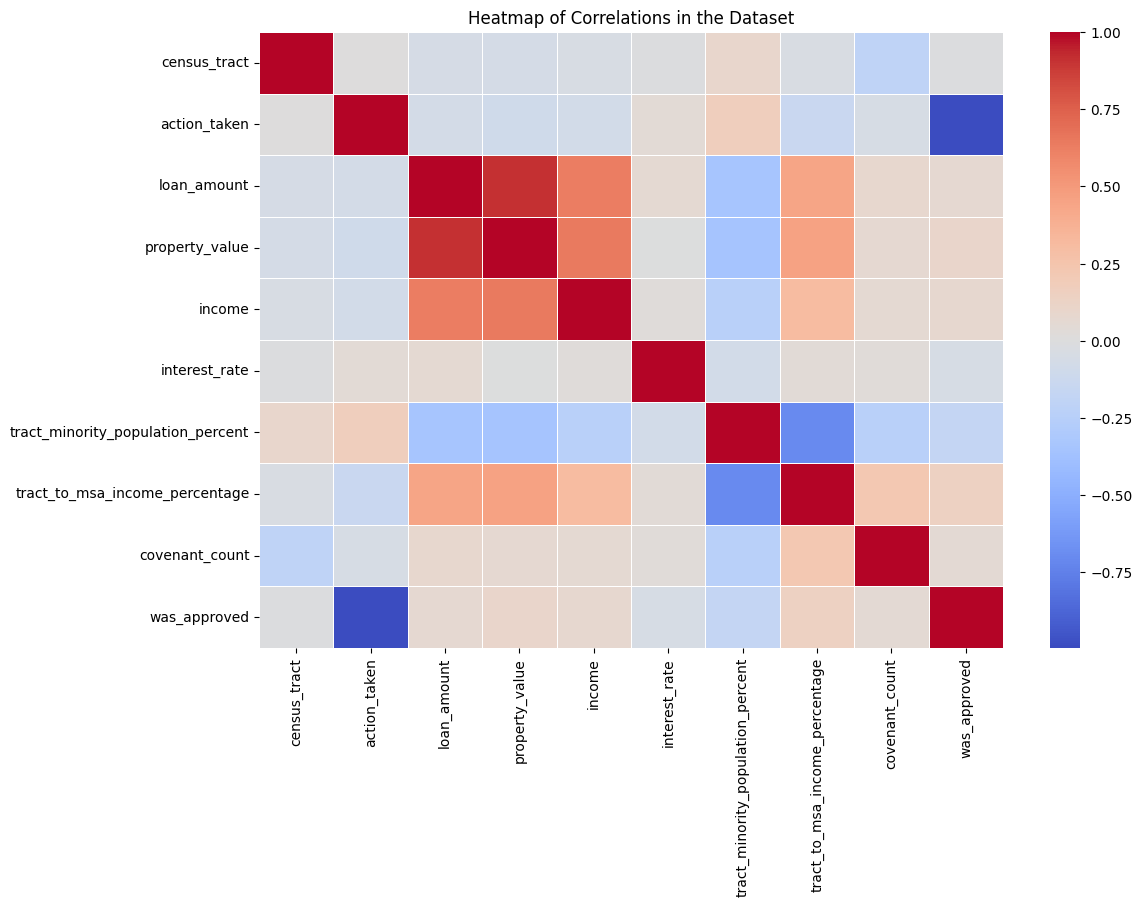

In [99]:
df_numeric = df.select_dtypes(include=['number']).drop(columns=['activity_year', 'denial_reason-1'])

# Compute the correlation matrix
correlation_matrix = df_numeric.corr()

# Set up the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, cmap='coolwarm', annot=False, linewidths=0.5)

# Customize the plot
plt.title('Heatmap of Correlations in the Dataset')
plt.show()

In [100]:
df['activity_year'].value_counts()

,count
activity_year,
2023,6704


In [101]:
df['census_tract'].value_counts()

,count
census_tract,
2.705310e+10,116
2.705303e+10,109
2.705302e+10,96
2.705303e+10,91
2.705301e+10,86
...,...
2.705313e+10,14
2.705311e+10,13
2.705303e+10,11


In [102]:
df['derived_race'].value_counts()

,count
derived_race,
White,5434
Black,483
Asian,413
Joint,297
Native American/Pacific Islander,65
2 or more minority races,12


In [103]:
df['action_taken'].value_counts()

,count
action_taken,
1,5951
6,617
2,123
8,13


In [104]:
df['loan_amount'].value_counts()

,count
loan_amount,
305000.0,281
285000.0,261
15000.0,260
295000.0,239
315000.0,236
...,...
1675000.0,1
2455000.0,1
1735000.0,1


In [105]:
df['property_value'].value_counts()

,count
property_value,
325000.0,284
305000.0,254
315000.0,247
335000.0,229
285000.0,227
...,...
2345000.0,1
2175000.0,1
2705000.0,1


In [106]:
df['income'].value_counts()

,count
income,
80.0,90
60.0,85
90.0,82
70.0,81
75.0,67
...,...
569.0,1
441.0,1
640.0,1


In [107]:
df['interest_rate'].value_counts()

,count
interest_rate,
6.625,507
6.500,465
6.875,442
6.750,377
7.125,349
...,...
5.150,1
6.350,1
5.350,1


In [108]:
df['tract_minority_population_percent'].value_counts()

,count
tract_minority_population_percent,
78.20,116
18.12,109
27.05,102
38.48,96
24.20,91
...,...
79.43,14
14.52,13
46.75,11


In [109]:
df['tract_to_msa_income_percentage'].value_counts()

,count
tract_to_msa_income_percentage,
58.66,116
168.84,109
83.64,96
93.46,91
95.32,86
...,...
44.63,14
150.96,13
83.11,11


In [110]:
df['denial_reason-1'].value_counts()

,count
denial_reason-1,
10,6704


In [111]:
df['covenant_count'].value_counts()

,count
covenant_count,
1.0,390
3.0,331
2.0,278
9.0,181
4.0,165
...,...
57.0,17
126.0,16
33.0,16


In [112]:
df['was_approved'].value_counts()

,count
was_approved,
1,6074
0,630


In [113]:
df['was_approved'] = df['was_approved'].astype(int)
df['was_approved'].value_counts()

,count
was_approved,
1,6074
0,630


In [114]:
df['covenant_density'].value_counts()

,count
covenant_density,
Low (1-50),2718
Very High (>200),1872
Medium (51-100),1059
High (101-200),1055


In [115]:
df_app = df[df['was_approved'] ==1]
df_rej = df[df['was_approved'] ==0]

In [116]:
df2= df.copy()

In [117]:
df2 = df2.dropna()

In [118]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6704 entries, 363 to 100922
Data columns (total 22 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   activity_year                          6704 non-null   int64  
 1   census_tract                           6704 non-null   float64
 2   derived_race                           6704 non-null   object 
 3   action_taken                           6704 non-null   int64  
 4   loan_amount                            6704 non-null   float64
 5   property_value                         6704 non-null   float64
 6   income                                 6704 non-null   float64
 7   interest_rate                          6704 non-null   float64
 8   tract_minority_population_percent      6704 non-null   float64
 9   tract_to_msa_income_percentage         6704 non-null   float64
 10  denial_reason-1                        6704 non-null   int64  
 11  coven

### Initial Analysis

In [119]:
df['derived_race'].value_counts()

,count
derived_race,
White,5434
Black,483
Asian,413
Joint,297
Native American/Pacific Islander,65
2 or more minority races,12


In [120]:
df = df.dropna()
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6704 entries, 363 to 100922
Data columns (total 22 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   activity_year                          6704 non-null   int64  
 1   census_tract                           6704 non-null   float64
 2   derived_race                           6704 non-null   object 
 3   action_taken                           6704 non-null   int64  
 4   loan_amount                            6704 non-null   float64
 5   property_value                         6704 non-null   float64
 6   income                                 6704 non-null   float64
 7   interest_rate                          6704 non-null   float64
 8   tract_minority_population_percent      6704 non-null   float64
 9   tract_to_msa_income_percentage         6704 non-null   float64
 10  denial_reason-1                        6704 non-null   int64  
 11  coven

In [121]:
df = df[df['derived_race'] != 'Race Not Available']
df = df[df['derived_race'] != 'Free Form Text Only']
df = df[df['derived_race'] != 'Joint']
df['derived_race'] = df['derived_race'].replace('Black or African American', 'Black')
df['derived_race'] = df['derived_race'].replace('2 or more minority races', 'Mixed Minority')
df['derived_race'] = df['derived_race'].replace('American Indian or Alaska Native', 'Native')
df['derived_race'] = df['derived_race'].replace('Native Hawaiian or Other Pacific Islander', 'Pacifican')
df['derived_race'].value_counts()

,count
derived_race,
White,5434
Black,483
Asian,413
Native American/Pacific Islander,65
Mixed Minority,12


In [122]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6407 entries, 363 to 100347
Data columns (total 22 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   activity_year                          6407 non-null   int64  
 1   census_tract                           6407 non-null   float64
 2   derived_race                           6407 non-null   object 
 3   action_taken                           6407 non-null   int64  
 4   loan_amount                            6407 non-null   float64
 5   property_value                         6407 non-null   float64
 6   income                                 6407 non-null   float64
 7   interest_rate                          6407 non-null   float64
 8   tract_minority_population_percent      6407 non-null   float64
 9   tract_to_msa_income_percentage         6407 non-null   float64
 10  denial_reason-1                        6407 non-null   int64  
 11  coven

<ipython-input-123-33f91acda419>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=approval_rate.index, y=approval_rate.values, ax=axes[0], palette='Greens')
<ipython-input-123-33f91acda419>:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=disapproval_rate.index, y=disapproval_rate.values, ax=axes[1], palette='Reds')


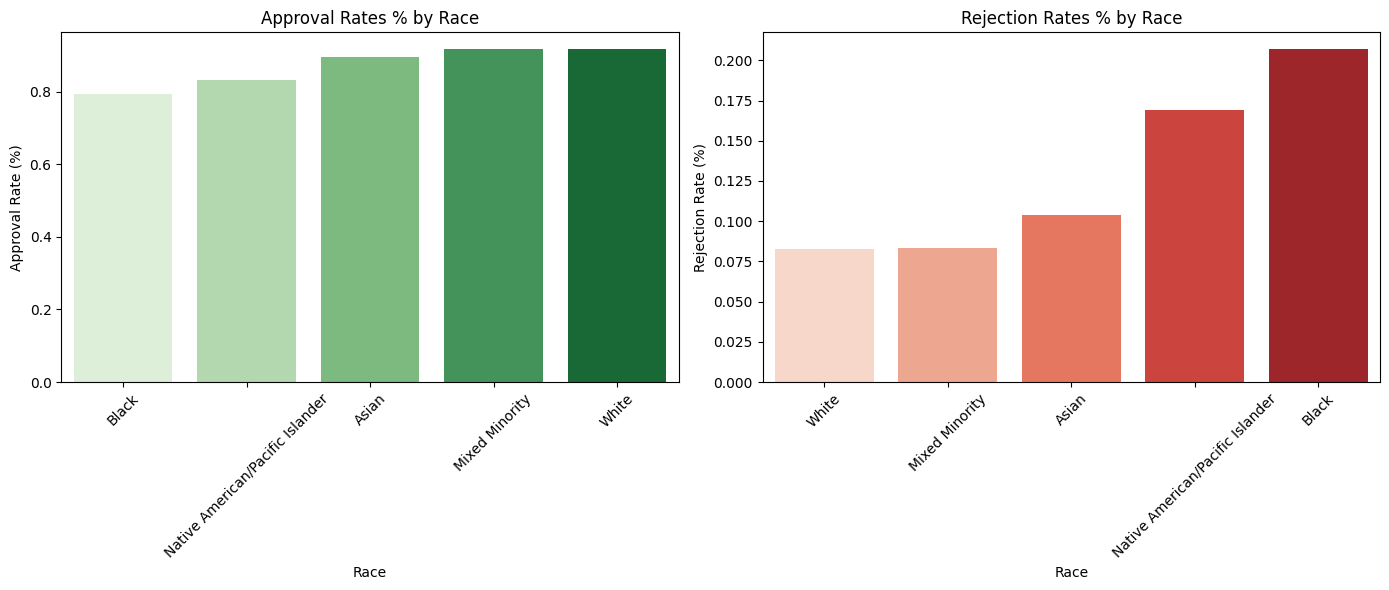

In [123]:
# Calculate the approval and disapproval rates by race
df_ratio = df.groupby(['derived_race', 'was_approved']).size().unstack().apply(lambda x: x / x.sum(), axis=1)

fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Plot approval rates
approval_rate = df_ratio[1].sort_values(ascending=True)
sns.barplot(x=approval_rate.index, y=approval_rate.values, ax=axes[0], palette='Greens')
axes[0].set_title('Approval Rates % by Race')
axes[0].set_xlabel('Race')
axes[0].set_ylabel('Approval Rate (%)')
axes[0].tick_params(axis='x', rotation=45)

# Plot disapproval rates
disapproval_rate = df_ratio[0].sort_values(ascending=True)
sns.barplot(x=disapproval_rate.index, y=disapproval_rate.values, ax=axes[1], palette='Reds')
axes[1].set_title('Rejection Rates % by Race')
axes[1].set_xlabel('Race')
axes[1].set_ylabel('Rejection Rate (%)')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

<ipython-input-124-a8e3b11411a0>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=approval_rate.index, y=approval_rate.values, ax=axes[0], palette='Greens')
<ipython-input-124-a8e3b11411a0>:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=disapproval_rate.index, y=disapproval_rate.values, ax=axes[1], palette='Reds')


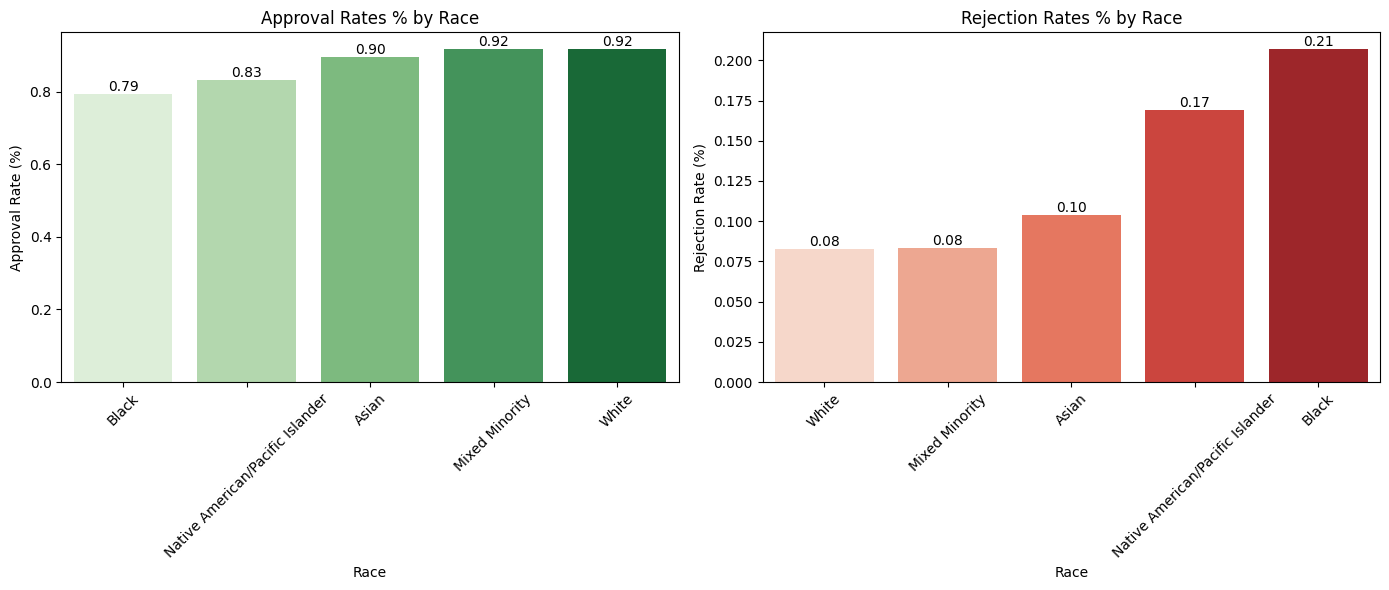

In [124]:
# Calculate the approval and disapproval rates by race
df_ratio = df.groupby(['derived_race', 'was_approved']).size().unstack().apply(lambda x: x / x.sum(), axis=1)

fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Plot approval rates
approval_rate = df_ratio[1].sort_values(ascending=True)
ax = sns.barplot(x=approval_rate.index, y=approval_rate.values, ax=axes[0], palette='Greens')
axes[0].set_title('Approval Rates % by Race')
axes[0].set_xlabel('Race')
axes[0].set_ylabel('Approval Rate (%)')
axes[0].tick_params(axis='x', rotation=45)



# Add text annotations with rounded values
for p in ax.patches:
    ax.text(p.get_x() + p.get_width() / 2., p.get_height(),
            f'{p.get_height():.2f}',  # Format to 2 decimal places
            ha='center', va='bottom')

# Plot disapproval rates
disapproval_rate = df_ratio[0].sort_values(ascending=True)
ax = sns.barplot(x=disapproval_rate.index, y=disapproval_rate.values, ax=axes[1], palette='Reds')
axes[1].set_title('Rejection Rates % by Race')
axes[1].set_xlabel('Race')
axes[1].set_ylabel('Rejection Rate (%)')
plt.xticks(rotation=45)

# Add text annotations with rounded values
for p in ax.patches:
    ax.text(p.get_x() + p.get_width() / 2., p.get_height(),
            f'{p.get_height():.2f}',  # Format to 2 decimal places
            ha='center', va='bottom')

plt.tight_layout()
plt.show()

In [125]:
df_ratio

was_approved,0,1
derived_race,,
Asian,0.104116,0.895884
Black,0.207039,0.792961
Mixed Minority,0.083333,0.916667
Native American/Pacific Islander,0.169231,0.830769
White,0.082812,0.917188


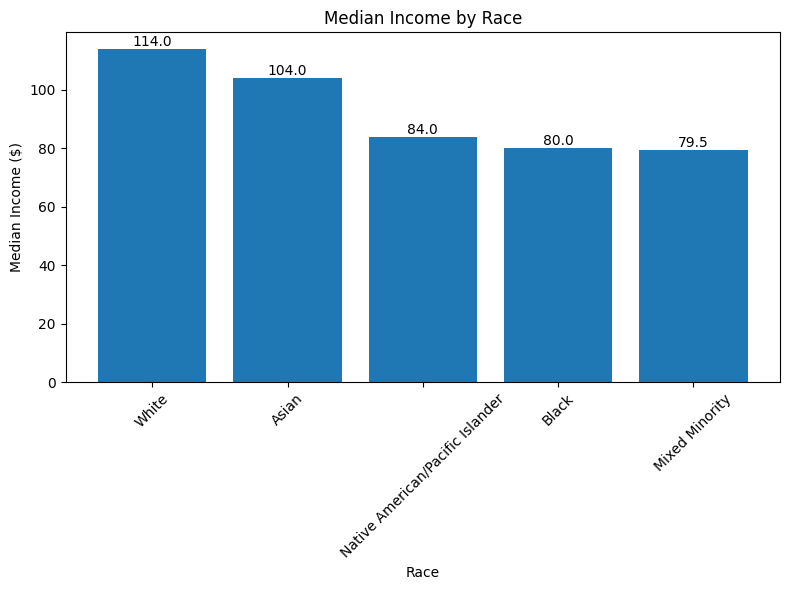

In [126]:
# Load your dataset


# Replace 'race' and 'income' with the actual column names from your dataset
median_income_by_race = df.groupby('derived_race')['income'].median().sort_values(ascending=False)
median_income_by_race = median_income_by_race.reset_index()




# Plotting the bar graph
plt.figure(figsize=(8, 6))
bars = plt.bar(median_income_by_race['derived_race'], median_income_by_race['income'])

# Adding labels on top of the bars
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, f'{height}', ha='center', va='bottom', fontsize=10)

# Adding labels and title
plt.xlabel('Race')
plt.ylabel('Median Income ($)')
plt.title('Median Income by Race')
plt.xticks(rotation=45)

# Show the plot
plt.tight_layout()
plt.show()

In [127]:
df_app = df[df['was_approved'] ==1]
df_rej = df[df['was_approved'] ==0]

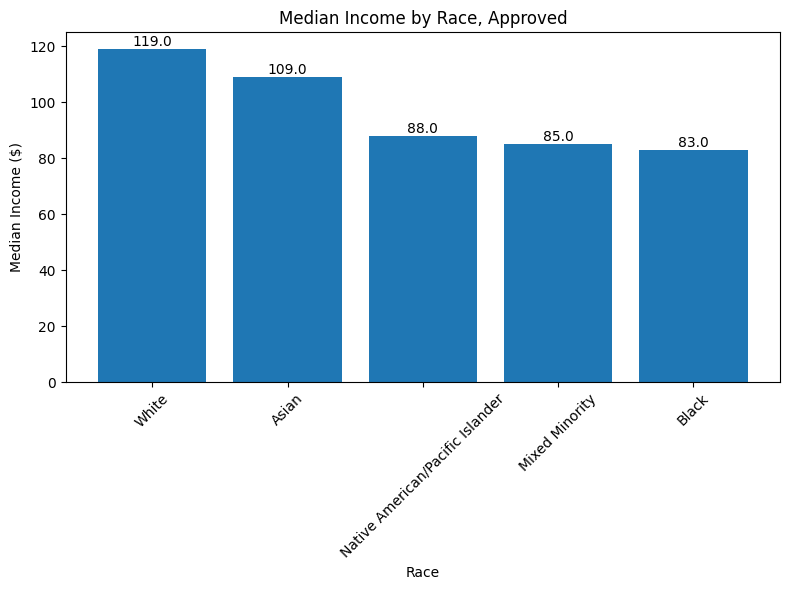

In [128]:
# Load your dataset


# Replace 'race' and 'income' with the actual column names from your dataset
median_income_by_race = df_app.groupby('derived_race')['income'].median().sort_values(ascending=False)
median_income_by_race = median_income_by_race.reset_index()




# Plotting the bar graph
plt.figure(figsize=(8, 6))
bars = plt.bar(median_income_by_race['derived_race'], median_income_by_race['income'])

# Adding labels on top of the bars
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, f'{height}', ha='center', va='bottom', fontsize=10)

# Adding labels and title
plt.xlabel('Race')
plt.ylabel('Median Income ($)')
plt.title('Median Income by Race, Approved')
plt.xticks(rotation=45)

# Show the plot
plt.tight_layout()
plt.show()

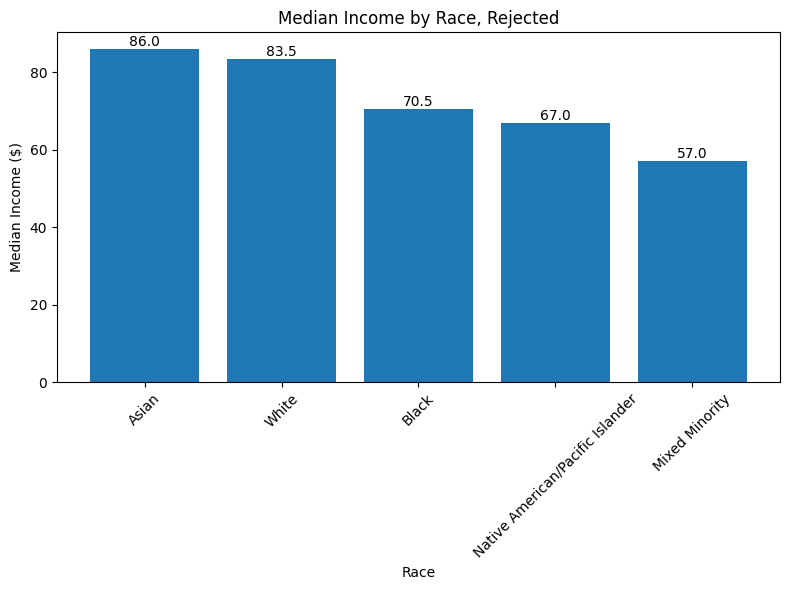

In [129]:
# Load your dataset


# Replace 'race' and 'income' with the actual column names from your dataset
median_income_by_race = df_rej.groupby('derived_race')['income'].median().sort_values(ascending=False)
median_income_by_race = median_income_by_race.reset_index()




# Plotting the bar graph
plt.figure(figsize=(8, 6))
bars = plt.bar(median_income_by_race['derived_race'], median_income_by_race['income'])

# Adding labels on top of the bars
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, f'{height}', ha='center', va='bottom', fontsize=10)

# Adding labels and title
plt.xlabel('Race')
plt.ylabel('Median Income ($)')
plt.title('Median Income by Race, Rejected')
plt.xticks(rotation=45)

# Show the plot
plt.tight_layout()
plt.show()

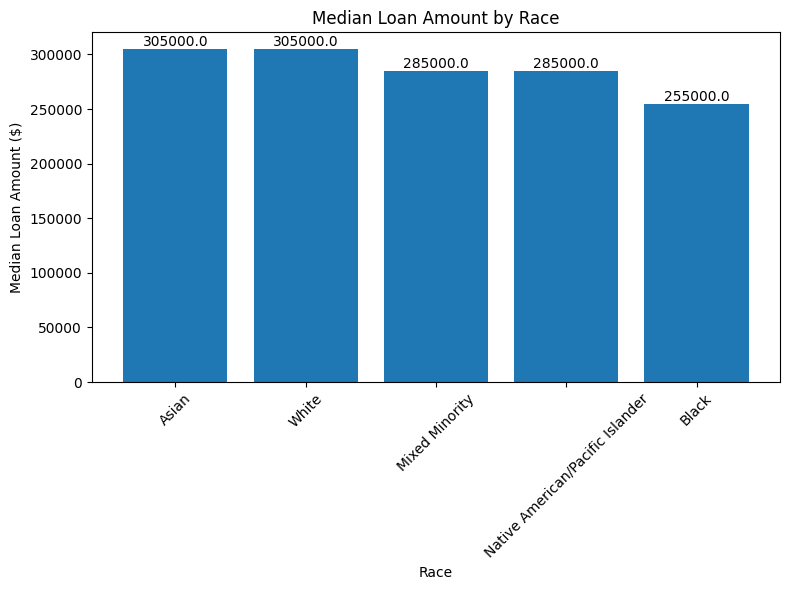

In [130]:
# Load your dataset


# Replace 'race' and 'income' with the actual column names from your dataset
focus = df.groupby('derived_race')['loan_amount'].median().sort_values(ascending=False)
focus = focus.reset_index()




# Plotting the bar graph
plt.figure(figsize=(8, 6))
bars = plt.bar(focus['derived_race'], focus['loan_amount'])

# Adding labels on top of the bars
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, f'{height}', ha='center', va='bottom', fontsize=10)

# Adding labels and title
plt.xlabel('Race')
plt.ylabel('Median Loan Amount ($)')
plt.title('Median Loan Amount by Race')
plt.xticks(rotation=45)

# Show the plot
plt.tight_layout()
plt.show()

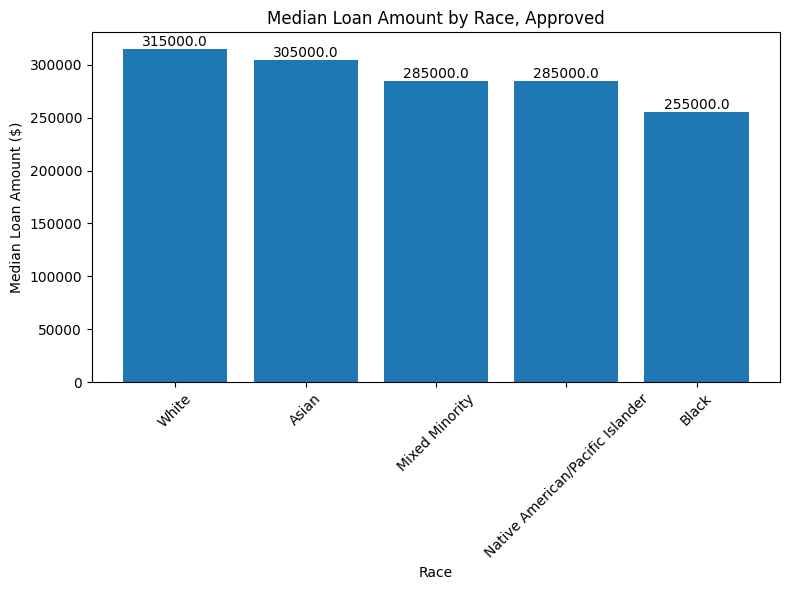

In [131]:
# Load your dataset


# Replace 'race' and 'income' with the actual column names from your dataset
focus = df_app.groupby('derived_race')['loan_amount'].median().sort_values(ascending=False)
focus = focus.reset_index()




# Plotting the bar graph
plt.figure(figsize=(8, 6))
bars = plt.bar(focus['derived_race'], focus['loan_amount'])

# Adding labels on top of the bars
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, f'{height}', ha='center', va='bottom', fontsize=10)

# Adding labels and title
plt.xlabel('Race')
plt.ylabel('Median Loan Amount ($)')
plt.title('Median Loan Amount by Race, Approved')
plt.xticks(rotation=45)

# Show the plot
plt.tight_layout()
plt.show()

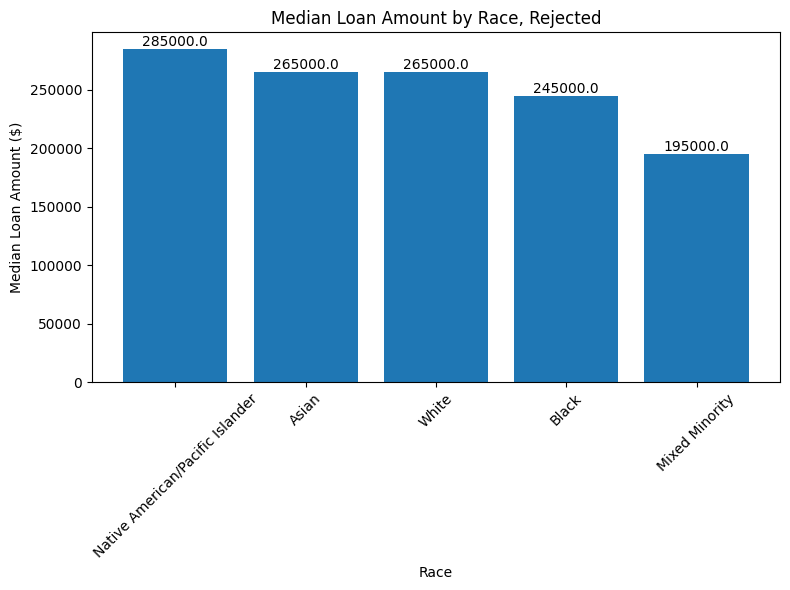

In [132]:
# Load your dataset


# Replace 'race' and 'income' with the actual column names from your dataset
focus = df_rej.groupby('derived_race')['loan_amount'].median().sort_values(ascending=False)
focus = focus.reset_index()




# Plotting the bar graph
plt.figure(figsize=(8, 6))
bars = plt.bar(focus['derived_race'], focus['loan_amount'])

# Adding labels on top of the bars
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, f'{height}', ha='center', va='bottom', fontsize=10)

# Adding labels and title
plt.xlabel('Race')
plt.ylabel('Median Loan Amount ($)')
plt.title('Median Loan Amount by Race, Rejected')
plt.xticks(rotation=45)

# Show the plot
plt.tight_layout()
plt.show()

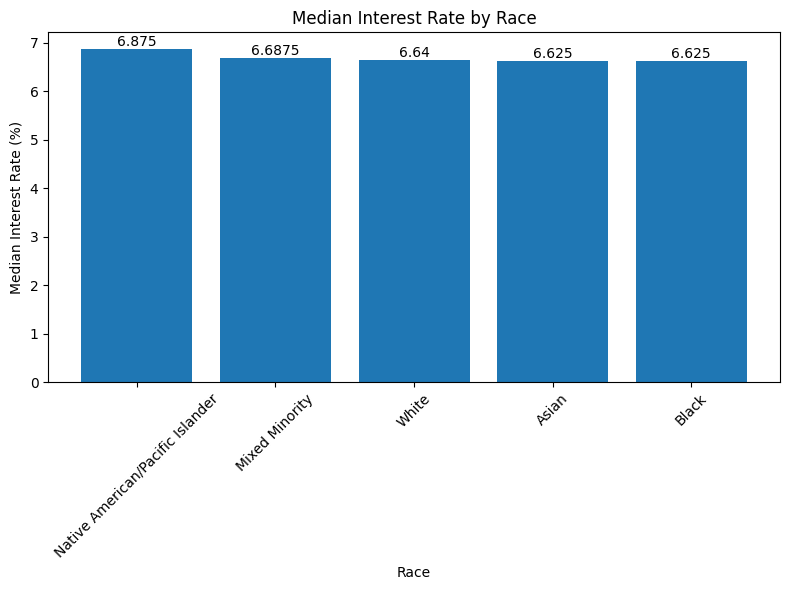

In [133]:
# Load your dataset


# Replace 'race' and 'income' with the actual column names from your dataset
focus = df.groupby('derived_race')['interest_rate'].median().sort_values(ascending=False)
focus = focus.reset_index()





# Plotting the bar graph
plt.figure(figsize=(8, 6))
bars = plt.bar(focus['derived_race'], focus['interest_rate'])

# Adding labels on top of the bars
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, f'{height}', ha='center', va='bottom', fontsize=10)

# Adding labels and title
plt.xlabel('Race')
plt.ylabel('Median Interest Rate (%)')
plt.title('Median Interest Rate by Race')
plt.xticks(rotation=45)

# Show the plot
plt.tight_layout()
plt.show()

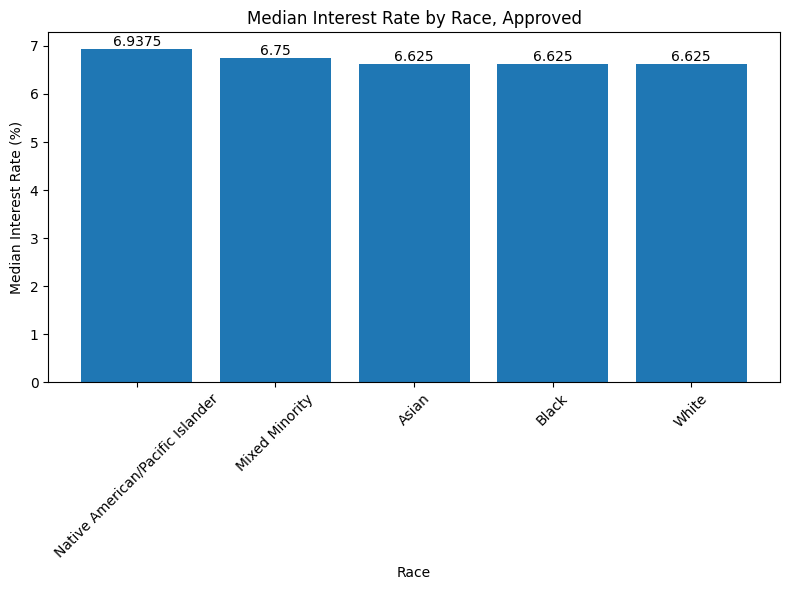

In [134]:
# Load your dataset


# Replace 'race' and 'income' with the actual column names from your dataset
focus = df_app.groupby('derived_race')['interest_rate'].median().sort_values(ascending=False)
focus = focus.reset_index()




# Plotting the bar graph
plt.figure(figsize=(8, 6))
bars = plt.bar(focus['derived_race'], focus['interest_rate'])

# Adding labels on top of the bars
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, f'{height}', ha='center', va='bottom', fontsize=10)

# Adding labels and title
plt.xlabel('Race')
plt.ylabel('Median Interest Rate (%)')
plt.title('Median Interest Rate by Race, Approved')
plt.xticks(rotation=45)

# Show the plot
plt.tight_layout()
plt.show()

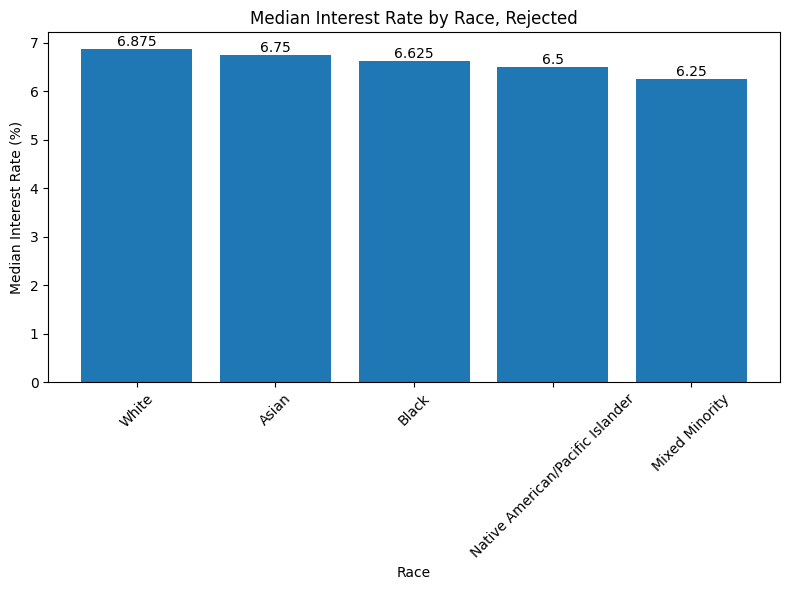

In [135]:
# Load your dataset


# Replace 'race' and 'income' with the actual column names from your dataset
focus = df_rej.groupby('derived_race')['interest_rate'].median().sort_values(ascending=False)
focus = focus.reset_index()




# Plotting the bar graph
plt.figure(figsize=(8, 6))
bars = plt.bar(focus['derived_race'], focus['interest_rate'])

# Adding labels on top of the bars
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, f'{height}', ha='center', va='bottom', fontsize=10)

# Adding labels and title
plt.xlabel('Race')
plt.ylabel('Median Interest Rate (%)')
plt.title('Median Interest Rate by Race, Rejected')
plt.xticks(rotation=45)

# Show the plot
plt.tight_layout()
plt.show()

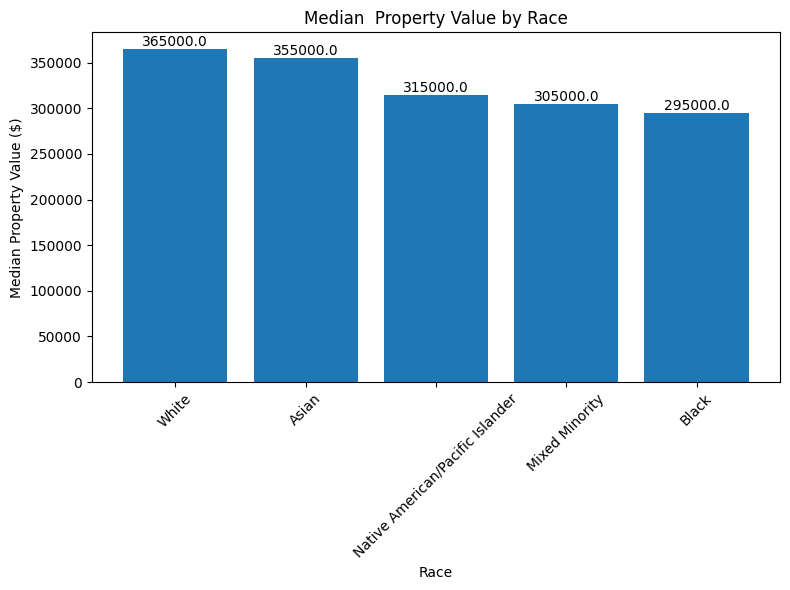

In [136]:
# Load your dataset


# Replace 'race' and 'income' with the actual column names from your dataset
focus = df.groupby('derived_race')['property_value'].median().sort_values(ascending=False)
focus = focus.reset_index()




# Plotting the bar graph
plt.figure(figsize=(8, 6))
bars = plt.bar(focus['derived_race'], focus['property_value'])

# Adding labels on top of the bars
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, f'{height}', ha='center', va='bottom', fontsize=10)

# Adding labels and title
plt.xlabel('Race')
plt.ylabel('Median Property Value ($)')
plt.title('Median  Property Value by Race')
plt.xticks(rotation=45)

# Show the plot
plt.tight_layout()
plt.show()

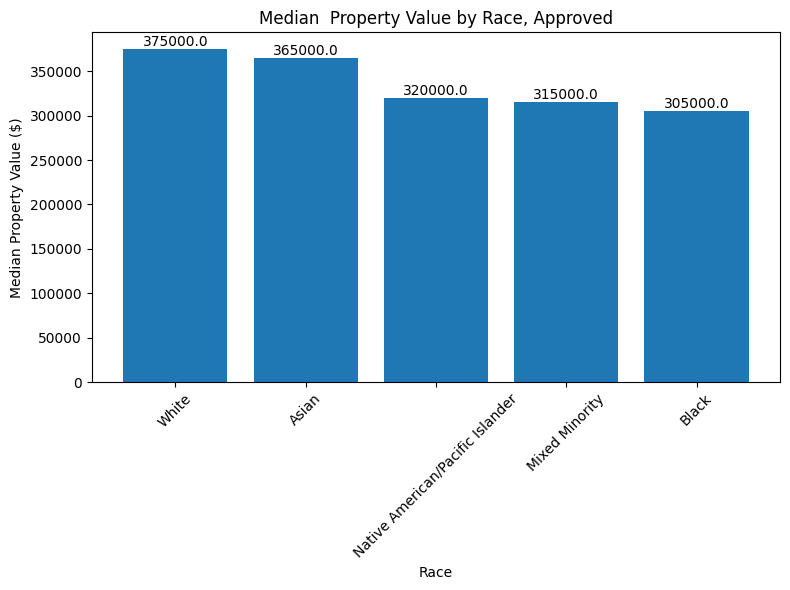

In [137]:
# Load your dataset


# Replace 'race' and 'income' with the actual column names from your dataset
focus = df_app.groupby('derived_race')['property_value'].median().sort_values(ascending=False)
focus = focus.reset_index()




# Plotting the bar graph
plt.figure(figsize=(8, 6))
bars = plt.bar(focus['derived_race'], focus['property_value'])

# Adding labels on top of the bars
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, f'{height}', ha='center', va='bottom', fontsize=10)

# Adding labels and title
plt.xlabel('Race')
plt.ylabel('Median Property Value ($)')
plt.title('Median  Property Value by Race, Approved')
plt.xticks(rotation=45)

# Show the plot
plt.tight_layout()
plt.show()

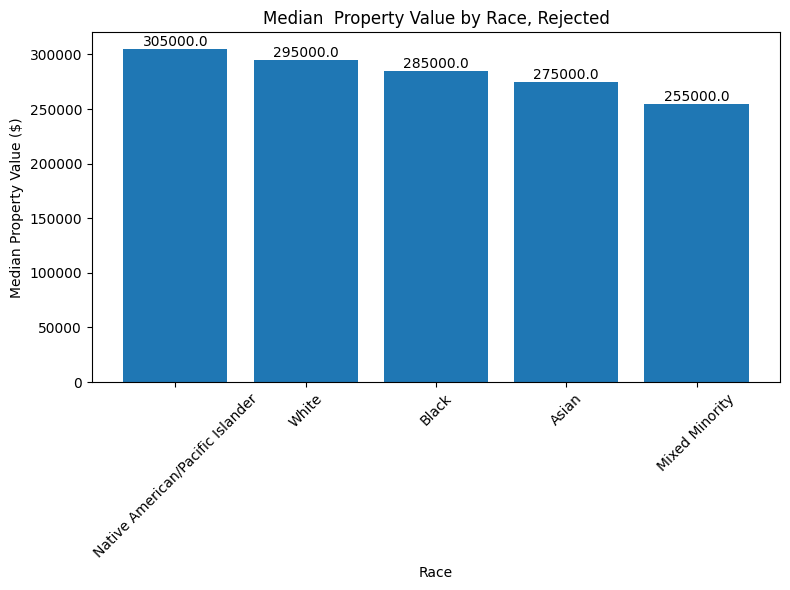

In [138]:
# Load your dataset


# Replace 'race' and 'income' with the actual column names from your dataset
focus = df_rej.groupby('derived_race')['property_value'].median().sort_values(ascending=False)
focus = focus.reset_index()




# Plotting the bar graph
plt.figure(figsize=(8, 6))
bars = plt.bar(focus['derived_race'], focus['property_value'])

# Adding labels on top of the bars
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, f'{height}', ha='center', va='bottom', fontsize=10)

# Adding labels and title
plt.xlabel('Race')
plt.ylabel('Median Property Value ($)')
plt.title('Median  Property Value by Race, Rejected')
plt.xticks(rotation=45)

# Show the plot
plt.tight_layout()
plt.show()

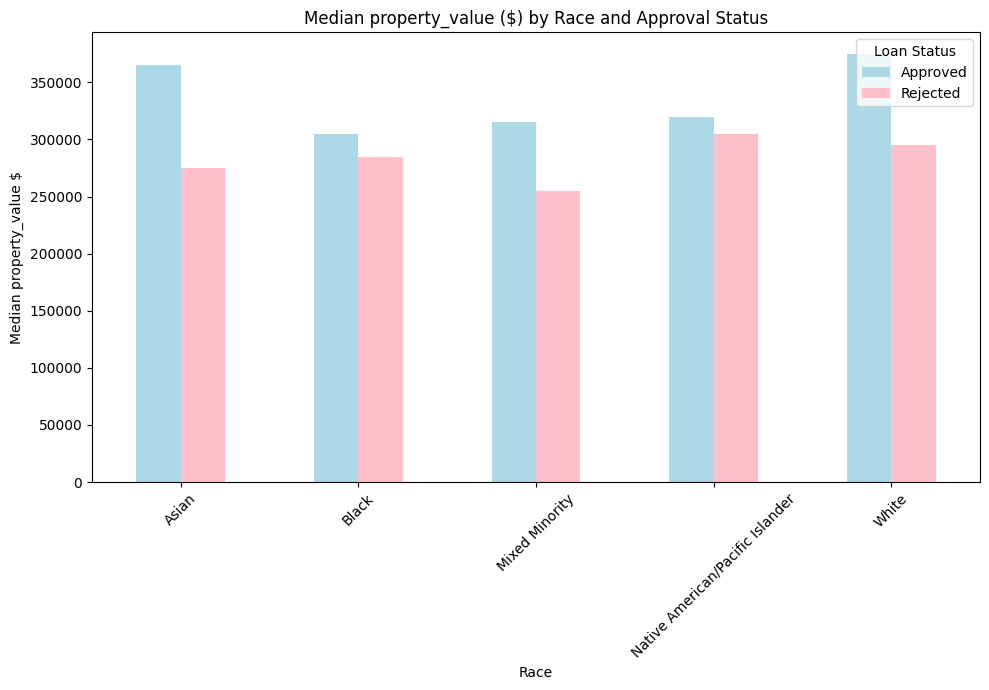

In [139]:
# Replace 'race', 'rural_urban', and 'income' with actual column names in your dataset
df_alt = df.copy()

df_alt['was_approved'] = df_alt['was_approved'].replace(0, 'Rejected')
df_alt['was_approved'] = df_alt['was_approved'].replace(1, 'Approved')

mfdocus= df_alt.groupby(['derived_race', 'was_approved'])['property_value'].median().unstack()


# Plotting the bar graph
mfdocus.plot(kind='bar', figsize=(10, 7), color=['lightblue', 'pink'])

# Adding labels and title
plt.xlabel('Race')
plt.ylabel('Median property_value $')
plt.title('Median property_value ($) by Race and Approval Status')
plt.xticks(rotation=45)
plt.legend(title='Loan Status', loc='upper right')

# Show the plot
plt.tight_layout()
plt.show()

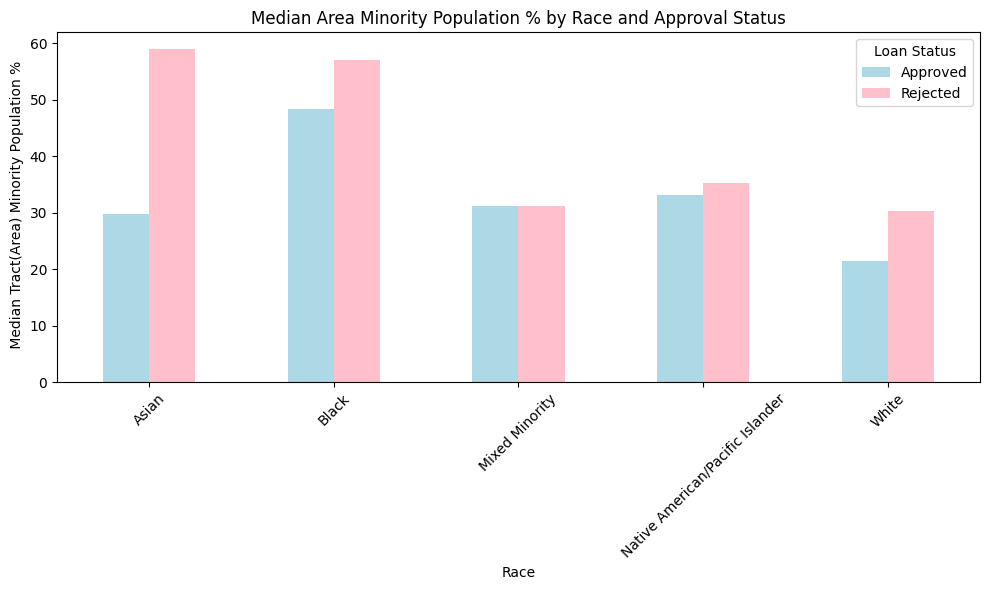

In [140]:
# Replace 'race', 'rural_urban', and 'income' with actual column names in your dataset
df_alt = df.copy()

df_alt['was_approved'] = df_alt['was_approved'].replace(0, 'Rejected')
df_alt['was_approved'] = df_alt['was_approved'].replace(1, 'Approved')

median_income_by_race_and_rural_urban = df_alt.groupby(['derived_race', 'was_approved'])['tract_minority_population_percent'].median().unstack()


# Plotting the bar graph
median_income_by_race_and_rural_urban.plot(kind='bar', figsize=(10, 6), color=['lightblue', 'pink'])

# Adding labels and title
plt.xlabel('Race')
plt.ylabel(' Median Tract(Area) Minority Population %')
plt.title('Median Area Minority Population % by Race and Approval Status')
plt.xticks(rotation=45)
plt.legend(title='Loan Status', loc='upper right')

# Show the plot
plt.tight_layout()
plt.show()

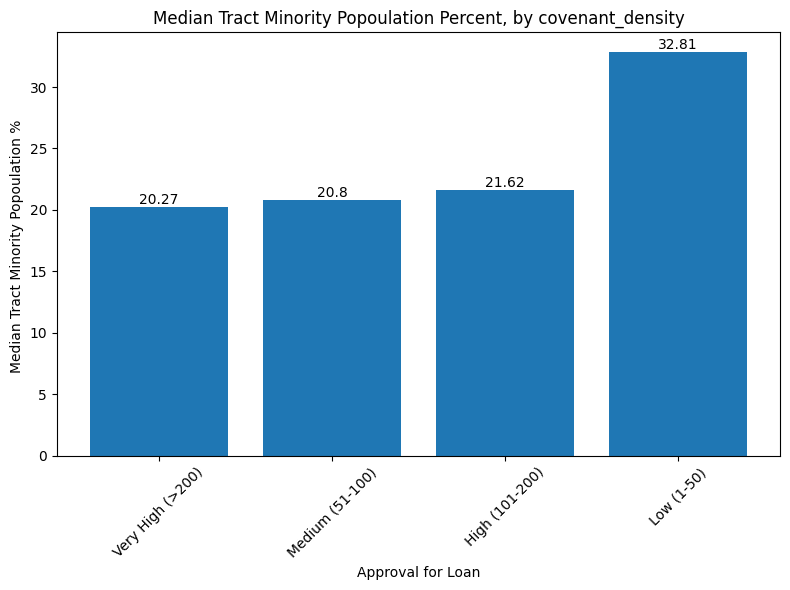

In [141]:
# Load your dataset


# Replace 'race' and 'income' with the actual column names from your dataset
focus = df.groupby('covenant_density')['tract_minority_population_percent'].median().sort_values(ascending=True)
focus = focus.reset_index()

#focus['was_approved'] = focus['was_approved'].replace(0, 'No')
#focus['was_approved'] = focus['was_approved'].replace(1, 'Yes')


# Plotting the bar graph
plt.figure(figsize=(8, 6))
bars = plt.bar(focus['covenant_density'], focus['tract_minority_population_percent'])

# Adding labels on top of the bars
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, f'{height}', ha='center', va='bottom', fontsize=10)

# Adding labels and title
plt.xlabel('Approval for Loan')
plt.ylabel('Median Tract Minority Popoulation % ')
plt.title('Median Tract Minority Popoulation Percent, by covenant_density')
plt.xticks(rotation=45)

# Show the plot
plt.tight_layout()
plt.show()

In [142]:
df['covenant_density'].value_counts()

,count
covenant_density,
Low (1-50),2598
Very High (>200),1788
Medium (51-100),1024
High (101-200),997


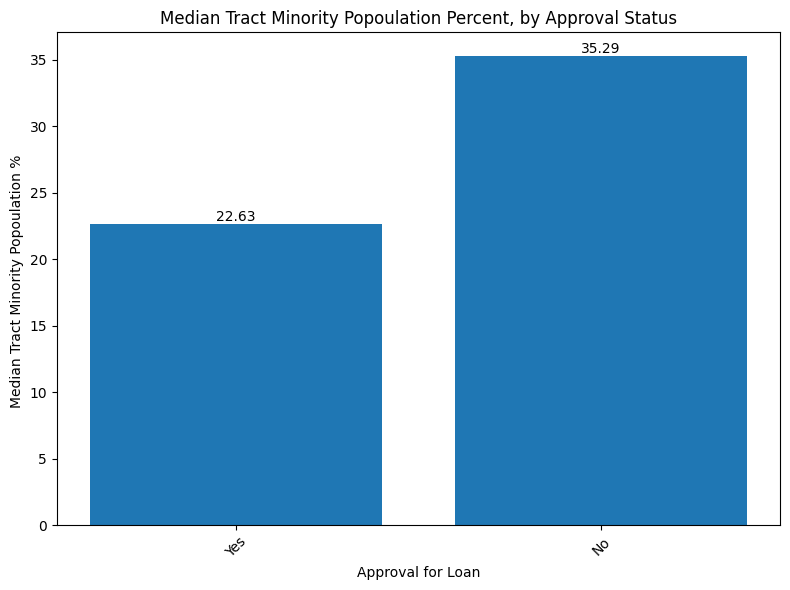

In [143]:
# Load your dataset


# Replace 'race' and 'income' with the actual column names from your dataset
focus = df.groupby('was_approved')['tract_minority_population_percent'].median().sort_values(ascending=True)
focus = focus.reset_index()

focus['was_approved'] = focus['was_approved'].replace(0, 'No')
focus['was_approved'] = focus['was_approved'].replace(1, 'Yes')


# Plotting the bar graph
plt.figure(figsize=(8, 6))
bars = plt.bar(focus['was_approved'], focus['tract_minority_population_percent'])

# Adding labels on top of the bars
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, f'{height}', ha='center', va='bottom', fontsize=10)

# Adding labels and title
plt.xlabel('Approval for Loan')
plt.ylabel('Median Tract Minority Popoulation % ')
plt.title('Median Tract Minority Popoulation Percent, by Approval Status')
plt.xticks(rotation=45)

# Show the plot
plt.tight_layout()
plt.show()

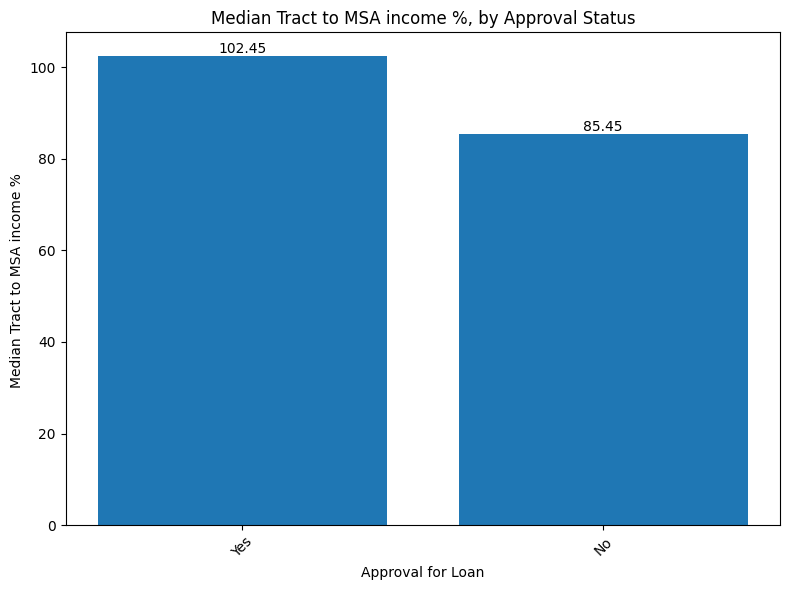

In [144]:
# Load your dataset


# Replace 'race' and 'income' with the actual column names from your dataset
focus = df.groupby('was_approved')['tract_to_msa_income_percentage'].median().sort_values(ascending=False)
focus = focus.reset_index()

focus['was_approved'] = focus['was_approved'].replace(0, 'No')
focus['was_approved'] = focus['was_approved'].replace(1, 'Yes')


# Plotting the bar graph
plt.figure(figsize=(8, 6))
bars = plt.bar(focus['was_approved'], focus['tract_to_msa_income_percentage'])

# Adding labels on top of the bars
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, f'{height}', ha='center', va='bottom', fontsize=10)

# Adding labels and title
plt.xlabel('Approval for Loan')
plt.ylabel('Median Tract to MSA income % ')
plt.title('Median Tract to MSA income %, by Approval Status')
plt.xticks(rotation=45)

# Show the plot
plt.tight_layout()
plt.show()

In [145]:
mode_body_type_by_race = df_rej.groupby('derived_race')['action_taken'].agg(lambda x: x.mode()[0])
mode_body_type_by_race

,action_taken
derived_race,
Asian,6
Black,6
Mixed Minority,6
Native American/Pacific Islander,6
White,6


In [146]:
df_black =  df[df['derived_race'] =='Black']
df_asian =  df[df['derived_race'] =='Asian']
df_mixed =  df[df['derived_race'] =='Mixed Minority']
df_native_m =  df[df['derived_race'] =='Native-Main']
df_native_o =  df[df['derived_race'] =='Native-Ocean']
df_white =  df[df['derived_race'] =='White']



In [147]:
df_black['covenant_count'].value_counts()

,count
covenant_count,
9.0,55
2.0,51
4.0,41
3.0,41
1.0,34
...,...
121.0,1
71.0,1
119.0,1


In [148]:
df_white['covenant_count'].value_counts()

,count
covenant_count,
1.0,278
3.0,242
2.0,198
7.0,130
212.0,120
...,...
126.0,14
176.0,13
485.0,13


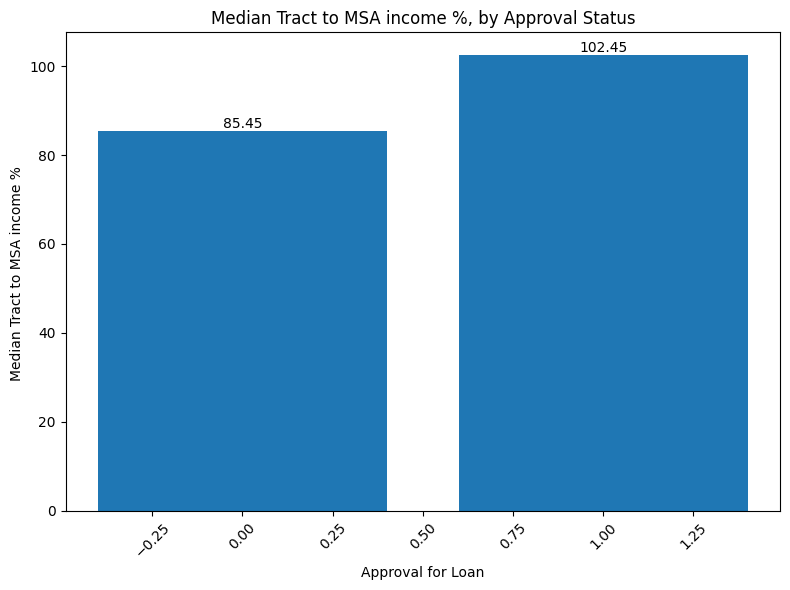

In [149]:
# Load your dataset


# Replace 'race' and 'income' with the actual column names from your dataset
focus = df.groupby('was_approved')['tract_to_msa_income_percentage'].median().sort_values(ascending=False)
focus = focus.reset_index()




# Plotting the bar graph
plt.figure(figsize=(8, 6))
bars = plt.bar(focus['was_approved'], focus['tract_to_msa_income_percentage'])

# Adding labels on top of the bars
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, f'{height}', ha='center', va='bottom', fontsize=10)

# Adding labels and title
plt.xlabel('Approval for Loan')
plt.ylabel('Median Tract to MSA income % ')
plt.title('Median Tract to MSA income %, by Approval Status')
plt.xticks(rotation=45)

# Show the plot
plt.tight_layout()
plt.show()

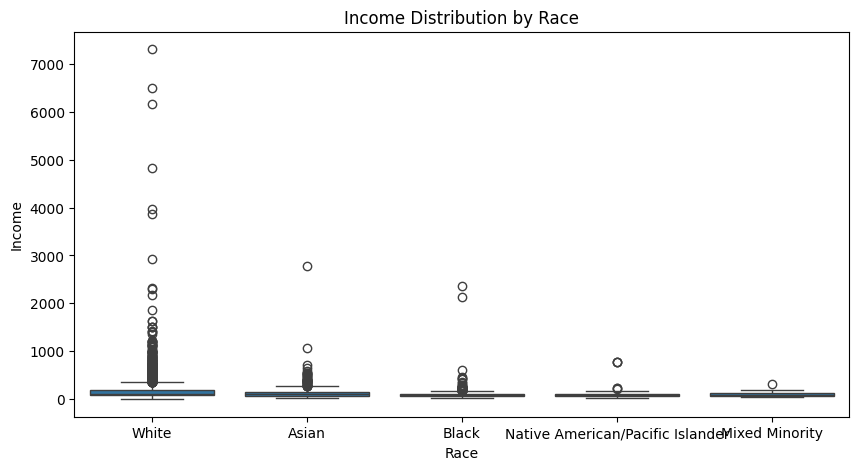

In [150]:
# Create the box plot
plt.figure(figsize=(10, 5))
sns.boxplot(x='derived_race', y='income', data=df)

# Customize the plot (optional)
plt.title('Income Distribution by Race')
plt.xlabel('Race')
plt.ylabel('Income')

# Show the plot
plt.show()

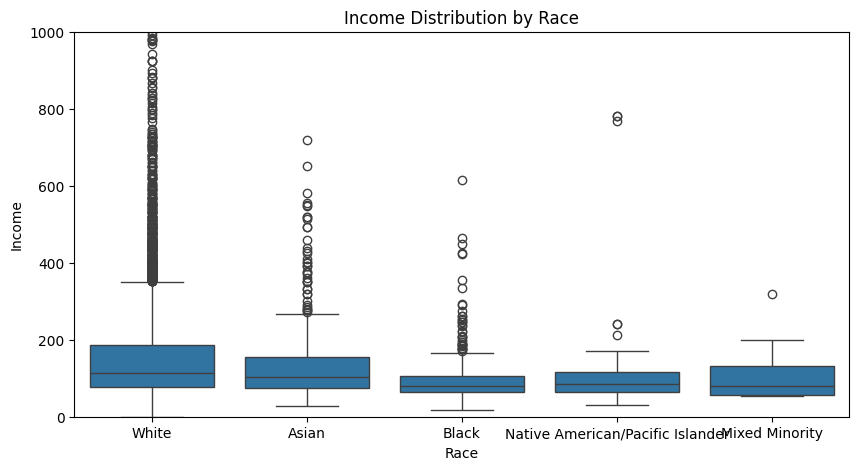

In [151]:
# Create the box plot
plt.figure(figsize=(10, 5))
sns.boxplot(x='derived_race', y='income', data=df)

# Customize the plot (optional)
plt.title('Income Distribution by Race')
plt.xlabel('Race')
plt.ylabel('Income')

# Set the y-axis limits
plt.ylim(0, 1000)  # Set y-axis max value to
# Show the plot
plt.show()

In [152]:
df_app = df[df['was_approved'] ==1]
df_rej = df[df['was_approved'] ==0]

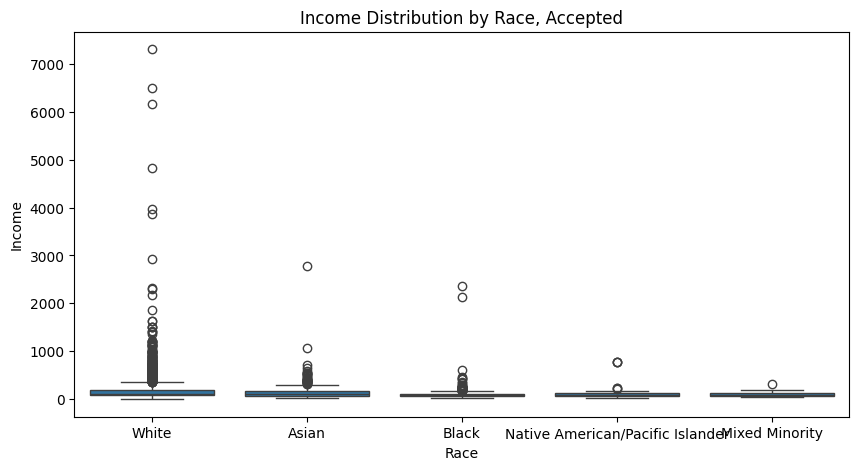

In [153]:
# Create the box plot
plt.figure(figsize=(10, 5))
sns.boxplot(x='derived_race', y='income', data=df_app)

# Customize the plot (optional)
plt.title('Income Distribution by Race, Accepted')
plt.xlabel('Race')
plt.ylabel('Income')

# Show the plot
plt.show()

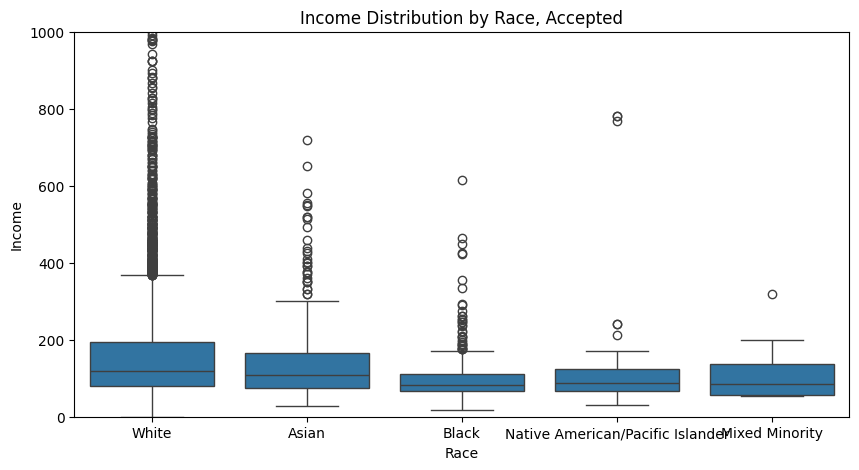

In [154]:
# Create the box plot
plt.figure(figsize=(10, 5))
sns.boxplot(x='derived_race', y='income', data=df_app)

# Customize the plot (optional)
plt.title('Income Distribution by Race, Accepted')
plt.xlabel('Race')
plt.ylabel('Income')
# Set the y-axis limits
plt.ylim(0, 1000)  # Set y-axis max value to
# Show the plot
plt.show()


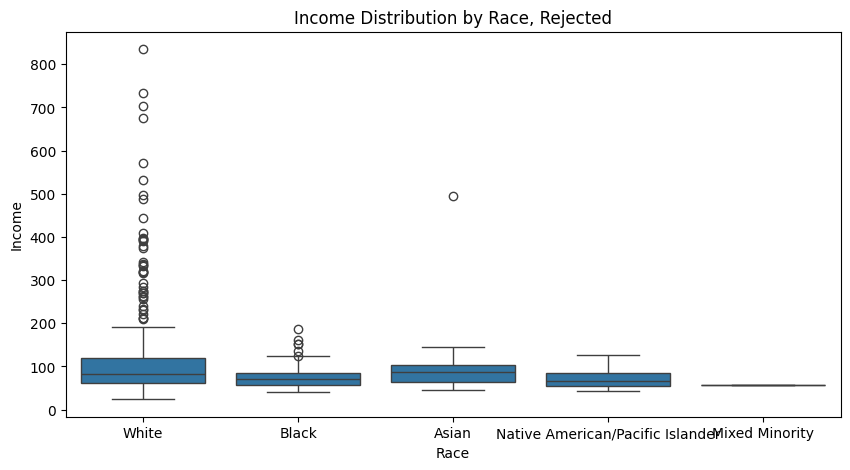

In [155]:
# Create the box plot
plt.figure(figsize=(10, 5))
sns.boxplot(x='derived_race', y='income', data=df_rej)

# Customize the plot (optional)
plt.title('Income Distribution by Race, Rejected')
plt.xlabel('Race')
plt.ylabel('Income')

# Show the plot
plt.show()

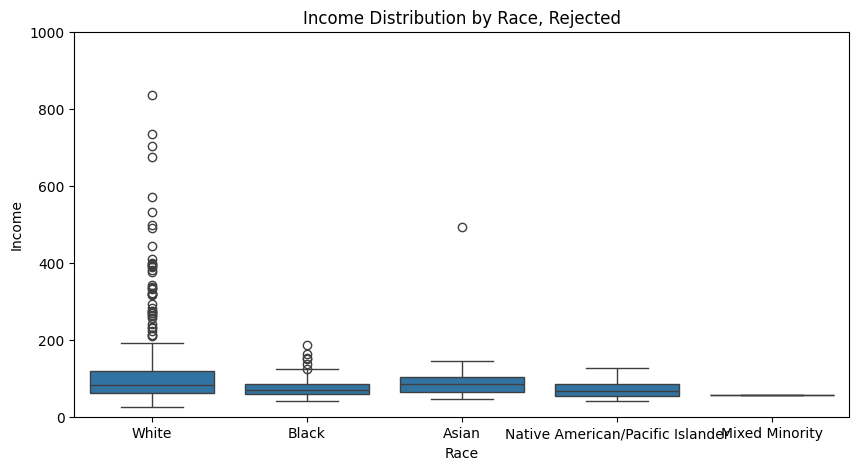

In [156]:
# Create the box plot
plt.figure(figsize=(10, 5))
sns.boxplot(x='derived_race', y='income', data=df_rej)

# Customize the plot (optional)
plt.title('Income Distribution by Race, Rejected')
plt.xlabel('Race')
plt.ylabel('Income')
# Set the y-axis limits
plt.ylim(0, 1000)  # Set y-axis max value to
# Show the plot
plt.show()

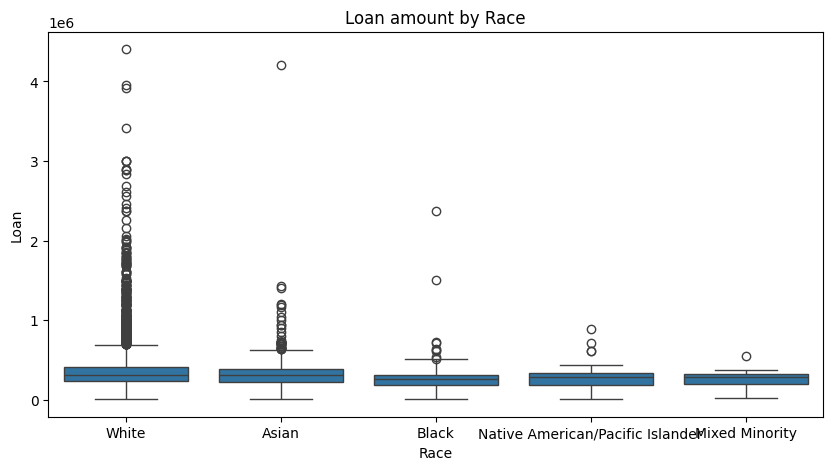

In [157]:
# Create the box plot
plt.figure(figsize=(10, 5))
sns.boxplot(x='derived_race', y='loan_amount', data=df)

# Customize the plot (optional)
plt.title('Loan amount by Race')
plt.xlabel('Race')
plt.ylabel('Loan')



# Show the plot
plt.show()

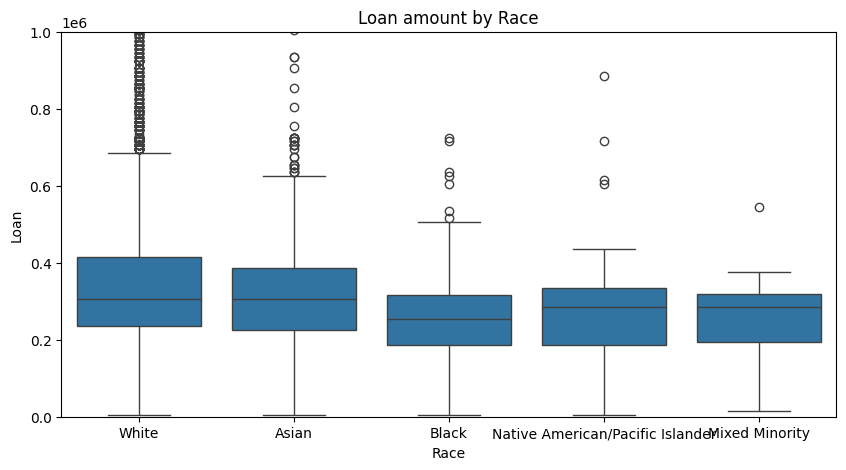

In [158]:
# Create the box plot
plt.figure(figsize=(10, 5))
sns.boxplot(x='derived_race', y='loan_amount', data=df)

# Customize the plot (optional)
plt.title('Loan amount by Race')
plt.xlabel('Race')
plt.ylabel('Loan')

# Set the y-axis limits
plt.ylim(0, 1000000)  # Set y-axis max value to

# Show the plot
plt.show()

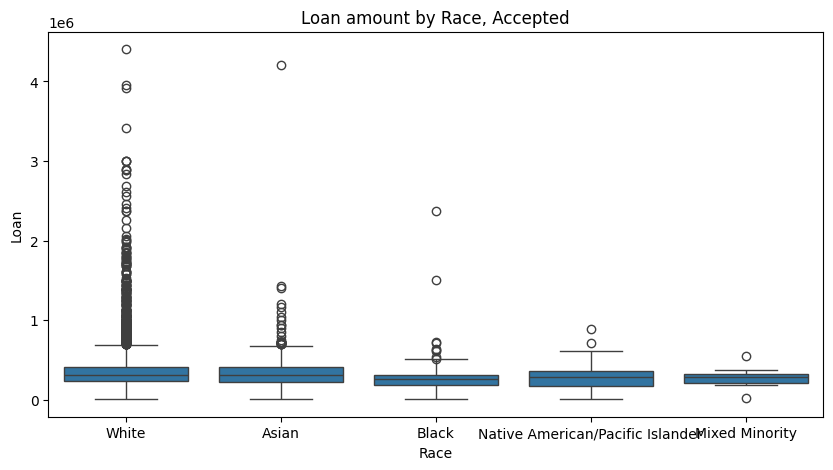

In [159]:
# Create the box plot
plt.figure(figsize=(10, 5))
sns.boxplot(x='derived_race', y='loan_amount', data=df_app)

# Customize the plot (optional)
plt.title('Loan amount by Race, Accepted')
plt.xlabel('Race')
plt.ylabel('Loan')

# Show the plot
plt.show()

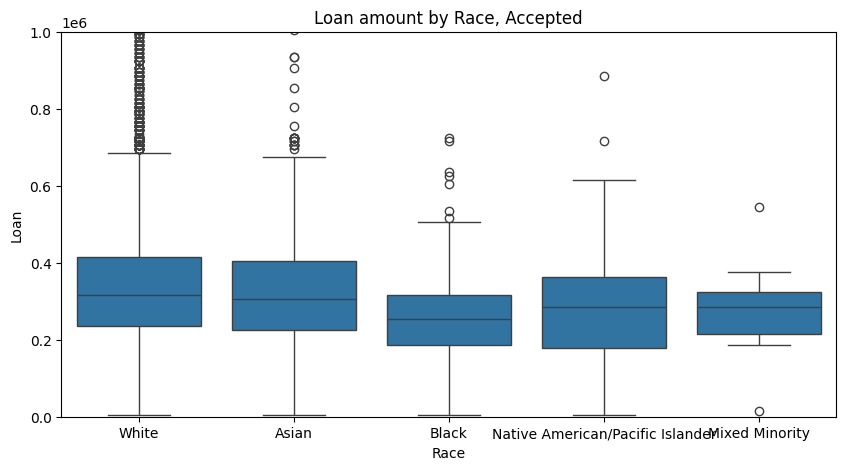

In [160]:
# Create the box plot
plt.figure(figsize=(10, 5))
sns.boxplot(x='derived_race', y='loan_amount', data=df_app)

# Customize the plot (optional)
plt.title('Loan amount by Race, Accepted')
plt.xlabel('Race')
plt.ylabel('Loan')

# Set the y-axis limits
plt.ylim(0, 1000000)  # Set y-axis max value to

# Show the plot
plt.show()

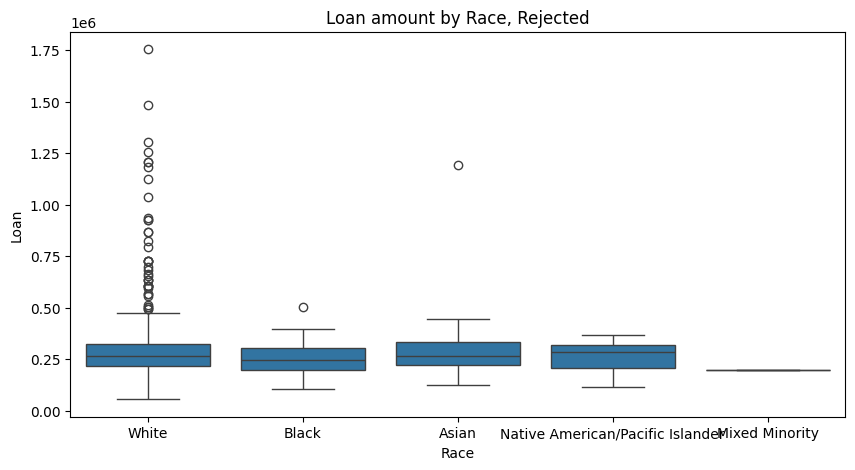

In [161]:
# Create the box plot
plt.figure(figsize=(10, 5))
sns.boxplot(x='derived_race', y='loan_amount', data=df_rej)

# Customize the plot (optional)
plt.title('Loan amount by Race, Rejected')
plt.xlabel('Race')
plt.ylabel('Loan')

# Show the plot
plt.show()

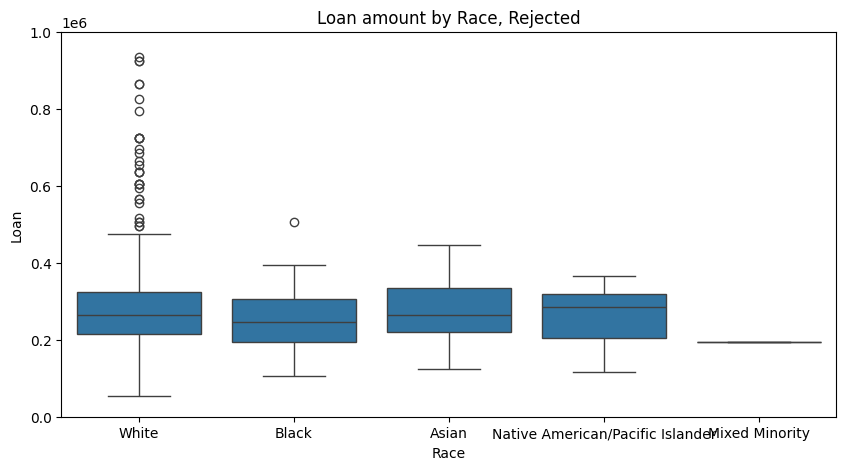

In [162]:
# Create the box plot
plt.figure(figsize=(10, 5))
sns.boxplot(x='derived_race', y='loan_amount', data=df_rej)

# Customize the plot (optional)
plt.title('Loan amount by Race, Rejected')
plt.xlabel('Race')
plt.ylabel('Loan')

# Set the y-axis limits
plt.ylim(0, 1000000)  # Set y-axis max value to

# Show the plot
plt.show()

In [163]:
df['loan_amount'].value_counts()

,count
loan_amount,
305000.0,259
285000.0,248
15000.0,245
265000.0,226
295000.0,225
...,...
2155000.0,1
1675000.0,1
2455000.0,1


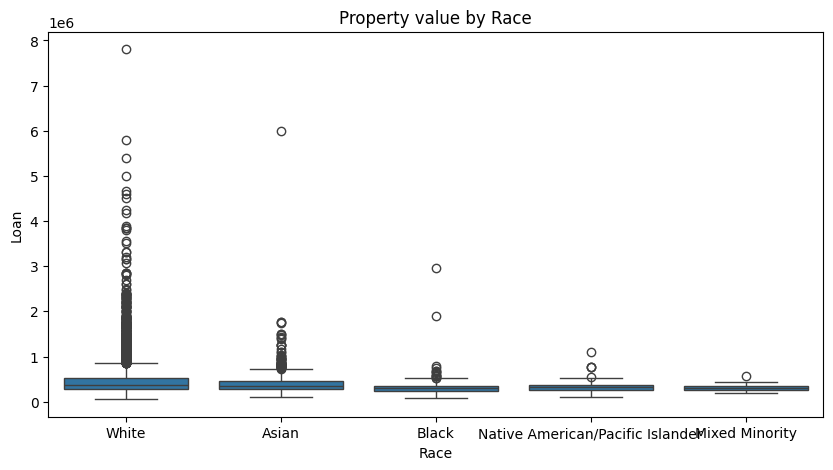

In [164]:
# Create the box plot
plt.figure(figsize=(10, 5))
sns.boxplot(x='derived_race', y='property_value', data=df)

# Customize the plot (optional)
plt.title('Property value by Race')
plt.xlabel('Race')
plt.ylabel('Loan')

# Show the plot
plt.show()

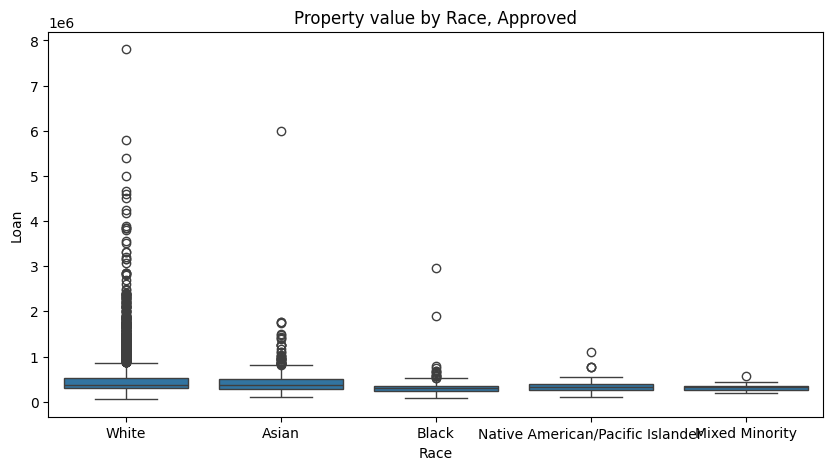

In [165]:
# Create the box plot
plt.figure(figsize=(10, 5))
sns.boxplot(x='derived_race', y='property_value', data=df_app)

# Customize the plot (optional)
plt.title('Property value by Race, Approved')
plt.xlabel('Race')
plt.ylabel('Loan')

# Show the plot
plt.show()

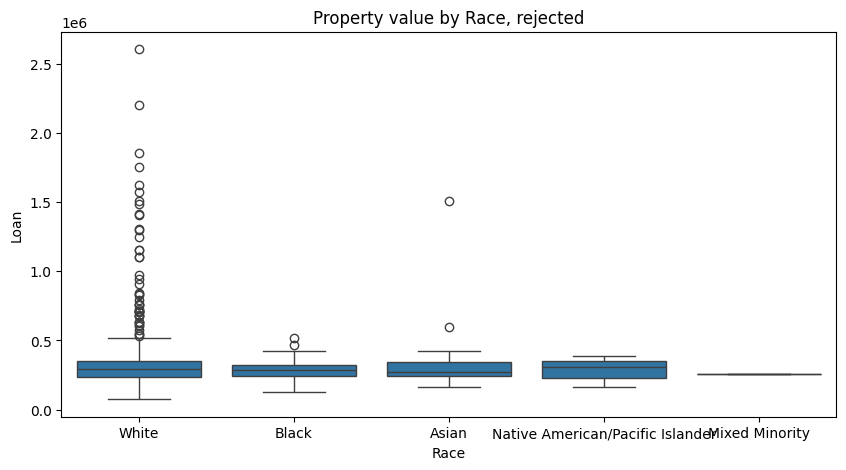

In [166]:
# Create the box plot
plt.figure(figsize=(10, 5))
sns.boxplot(x='derived_race', y='property_value', data=df_rej)

# Customize the plot (optional)
plt.title('Property value by Race, rejected')
plt.xlabel('Race')
plt.ylabel('Loan')

# Show the plot
plt.show()

In [167]:
#property_value

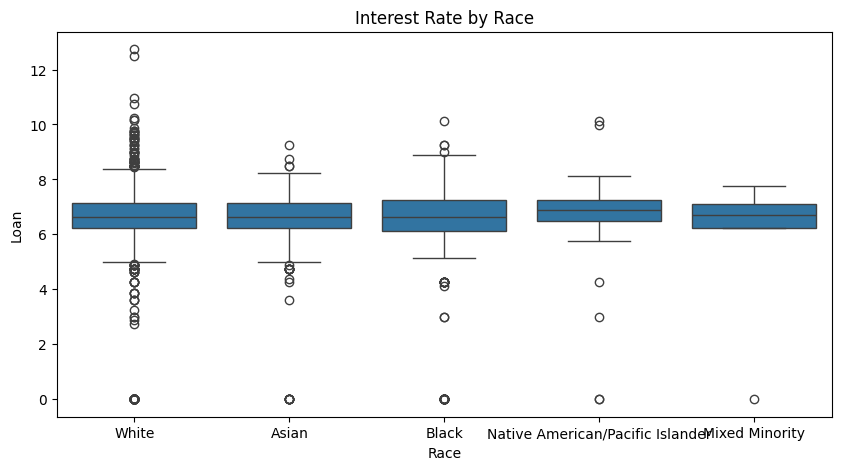

In [168]:
# Create the box plot
plt.figure(figsize=(10, 5))
sns.boxplot(x='derived_race', y='interest_rate', data=df)

# Customize the plot (optional)
plt.title('Interest Rate by Race')
plt.xlabel('Race')
plt.ylabel('Loan')

# Show the plot
plt.show()

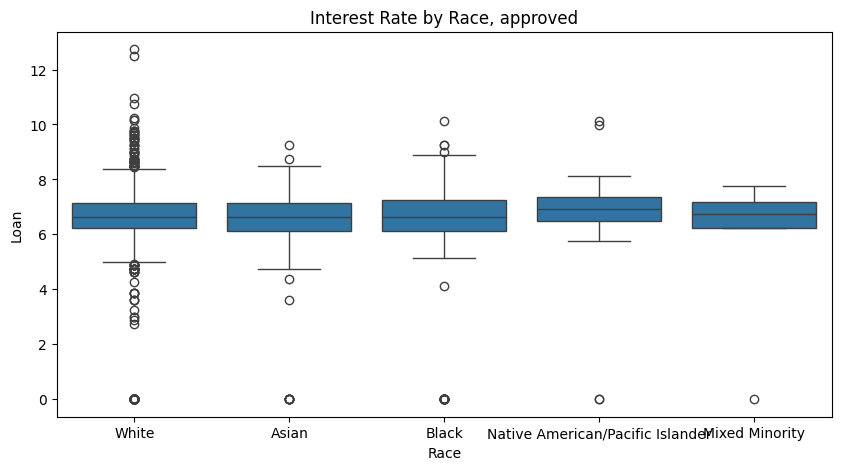

In [169]:
# Create the box plot
plt.figure(figsize=(10, 5))
sns.boxplot(x='derived_race', y='interest_rate', data=df_app)

# Customize the plot (optional)
plt.title('Interest Rate by Race, approved')
plt.xlabel('Race')
plt.ylabel('Loan')

# Show the plot
plt.show()

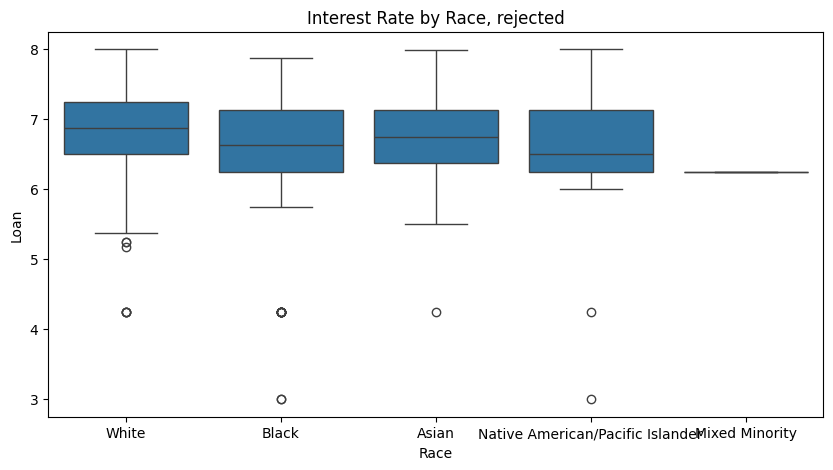

In [170]:
# Create the box plot
plt.figure(figsize=(10, 5))
sns.boxplot(x='derived_race', y='interest_rate', data=df_rej)

# Customize the plot (optional)
plt.title('Interest Rate by Race, rejected')
plt.xlabel('Race')
plt.ylabel('Loan')

# Show the plot
plt.show()

### Missing Values

In [171]:
# Count missing values in each column
missing_counts = df.isnull().sum()
print("Missing Values per Column:\n", missing_counts)

# Total missing values in the dataset
total_missing = df.isnull().sum().sum()
print("\nTotal Missing Values:", total_missing)

Missing Values per Column:
 activity_year                            0
census_tract                             0
derived_race                             0
action_taken                             0
loan_amount                              0
property_value                           0
income                                   0
interest_rate                            0
tract_minority_population_percent        0
tract_to_msa_income_percentage           0
denial_reason-1                          0
covenant_count                           0
was_approved                             0
covenant_density                         0
race_Asian                               0
race_Black                               0
race_Joint                               0
race_Native American/Pacific Islander    0
race_White                               0
covenant_density_Low (1-50)              0
covenant_density_Medium (51-100)         0
covenant_density_Very High (>200)        0
dtype: int64

Total Missin

In [172]:
df = df[df['derived_race'] != 'Race Not Available']
df['was_approved'] = df['was_approved'].astype(int)

In [173]:
df = df.dropna(subset=["covenant_density","loan_amount", "income", "interest_rate"])


In [174]:
# Median imputation for property_value and income
df["property_value"].fillna(df["property_value"].median(), inplace=True)
df["income"].fillna(df["income"].median(), inplace=True)

# Mean imputation for other numeric columns
df["interest_rate"].fillna(df["interest_rate"].mean(), inplace=True)
df["tract_minority_population_percent"].fillna(df["tract_minority_population_percent"].mean(), inplace=True)
df["tract_to_msa_income_percentage"].fillna(df["tract_to_msa_income_percentage"].mean(), inplace=True)

<ipython-input-174-66510e7e92b2>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["property_value"].fillna(df["property_value"].median(), inplace=True)
<ipython-input-174-66510e7e92b2>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value

In [175]:
df["census_tract"].fillna(df["census_tract"].mode()[0], inplace=True)
df["denial_reason-1"].fillna(df["denial_reason-1"].mode()[0], inplace=True)

<ipython-input-175-c023da2a8e98>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["census_tract"].fillna(df["census_tract"].mode()[0], inplace=True)
<ipython-input-175-c023da2a8e98>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, i

In [176]:
print("Missing Values After Cleaning:\n", df.isnull().sum())

Missing Values After Cleaning:
 activity_year                            0
census_tract                             0
derived_race                             0
action_taken                             0
loan_amount                              0
property_value                           0
income                                   0
interest_rate                            0
tract_minority_population_percent        0
tract_to_msa_income_percentage           0
denial_reason-1                          0
covenant_count                           0
was_approved                             0
covenant_density                         0
race_Asian                               0
race_Black                               0
race_Joint                               0
race_Native American/Pacific Islander    0
race_White                               0
covenant_density_Low (1-50)              0
covenant_density_Medium (51-100)         0
covenant_density_Very High (>200)        0
dtype: int64


In [177]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6407 entries, 363 to 100347
Data columns (total 22 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   activity_year                          6407 non-null   int64  
 1   census_tract                           6407 non-null   float64
 2   derived_race                           6407 non-null   object 
 3   action_taken                           6407 non-null   int64  
 4   loan_amount                            6407 non-null   float64
 5   property_value                         6407 non-null   float64
 6   income                                 6407 non-null   float64
 7   interest_rate                          6407 non-null   float64
 8   tract_minority_population_percent      6407 non-null   float64
 9   tract_to_msa_income_percentage         6407 non-null   float64
 10  denial_reason-1                        6407 non-null   int64  
 11  coven

In [178]:
print(df.columns)  # Ensure "race" is listed exactly as expected

Index(['activity_year', 'census_tract', 'derived_race', 'action_taken',
       'loan_amount', 'property_value', 'income', 'interest_rate',
       'tract_minority_population_percent', 'tract_to_msa_income_percentage',
       'denial_reason-1', 'covenant_count', 'was_approved', 'covenant_density',
       'race_Asian', 'race_Black', 'race_Joint',
       'race_Native American/Pacific Islander', 'race_White',
       'covenant_density_Low (1-50)', 'covenant_density_Medium (51-100)',
       'covenant_density_Very High (>200)'],
      dtype='object')


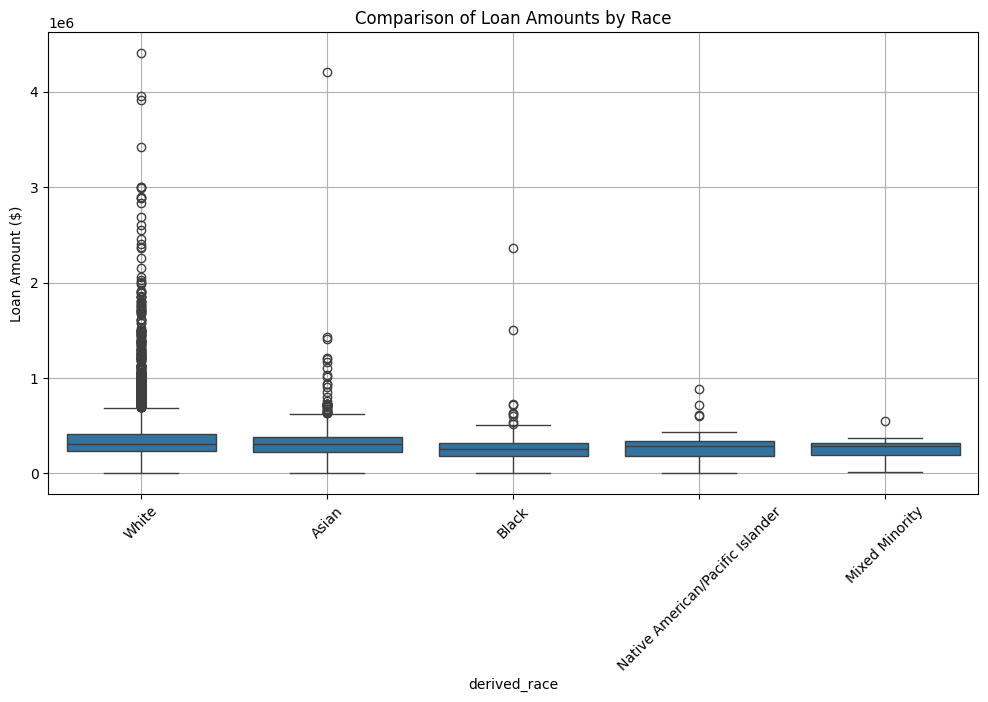

In [179]:
# Boxplot of loan_amount by race
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x="derived_race", y="loan_amount")

# Labels and title
plt.xlabel("derived_race")
plt.ylabel("Loan Amount ($)")
plt.title("Comparison of Loan Amounts by Race")
plt.xticks(rotation=45)  # Rotate x-axis labels if needed
plt.grid(True)

# Show plot
plt.show()

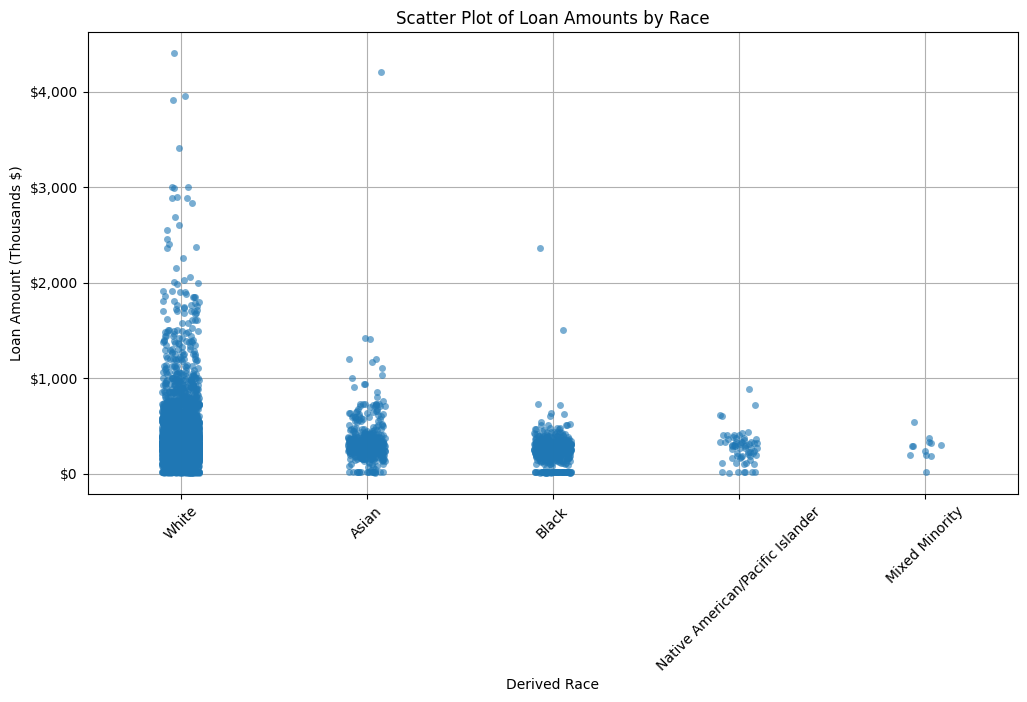

In [180]:
# Scatter plot of loan_amount by race
plt.figure(figsize=(12, 6))
sns.stripplot(data=df, x="derived_race", y="loan_amount", jitter=True, alpha=0.6)

# Add labels and title
plt.xlabel("Derived Race")
plt.ylabel("Loan Amount (Thousands $)")  # Updated label to reflect thousands
plt.title("Scatter Plot of Loan Amounts by Race")

# Modify y-axis to show loan amounts in thousands
plt.gca().get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: "${:,}".format(int(x / 1000))))

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Show grid for better visualization
plt.grid(True)

# Show the plot
plt.show()

derived_race
Asian                               348220.338983
Black                               251128.364389
Mixed Minority                      271666.666667
Native American/Pacific Islander    273615.384615
White                               367377.622378
Name: loan_amount, dtype: float64


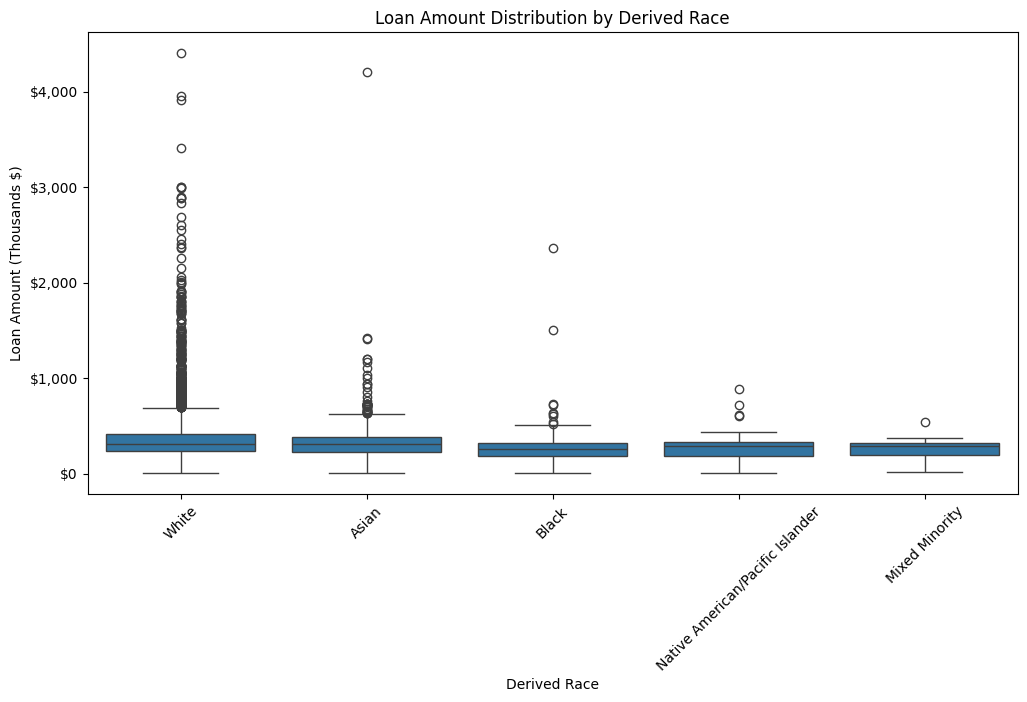

In [181]:
loan_amount_by_race = df.groupby("derived_race")["loan_amount"].mean()
print(loan_amount_by_race)

# Boxplot to visualize loan amount distribution by race
import matplotlib.pyplot as plt
import seaborn as sns

# Create a figure with custom size
plt.figure(figsize=(12, 6))

# Boxplot to visualize the loan amount distribution by derived race
sns.boxplot(data=df, x="derived_race", y="loan_amount")

# Add labels and title to the plot
plt.xlabel("Derived Race")
plt.ylabel("Loan Amount (Thousands $)")  # Update label to reflect thousands
plt.title("Loan Amount Distribution by Derived Race")

# Divide loan amount by 1000 for the y-axis
plt.gca().get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: "${:,}".format(int(x / 1000))))

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Show the plot
plt.show()

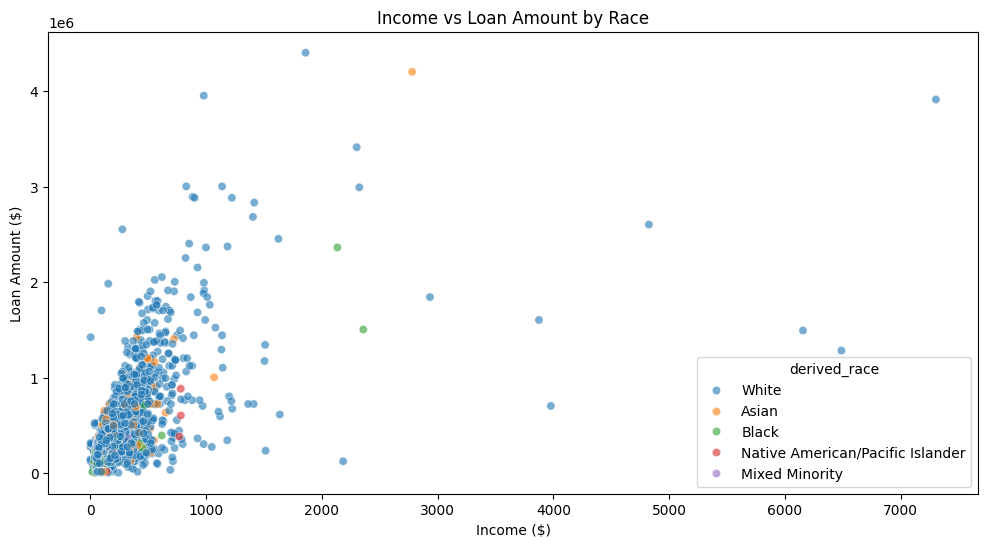

Correlation between Income and Loan Amount: 0.6258862348600167


In [182]:
# Scatter plot to check the relationship between income and loan amount
plt.figure(figsize=(12, 6))
sns.scatterplot(data=df, x="income", y="loan_amount", hue="derived_race", alpha=0.6)
plt.xlabel("Income ($)")
plt.ylabel("Loan Amount ($)")
plt.title("Income vs Loan Amount by Race")
plt.show()

# Correlation between income and loan amount
correlation_income_loan = df["income"].corr(df["loan_amount"])
print(f"Correlation between Income and Loan Amount: {correlation_income_loan}")

derived_race
Asian                               0.895884
Black                               0.792961
Mixed Minority                      0.916667
Native American/Pacific Islander    0.830769
White                               0.917188
Name: was_approved, dtype: float64


<ipython-input-183-9cf9cffd8998>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, x="derived_race", y="was_approved", palette="Set2")


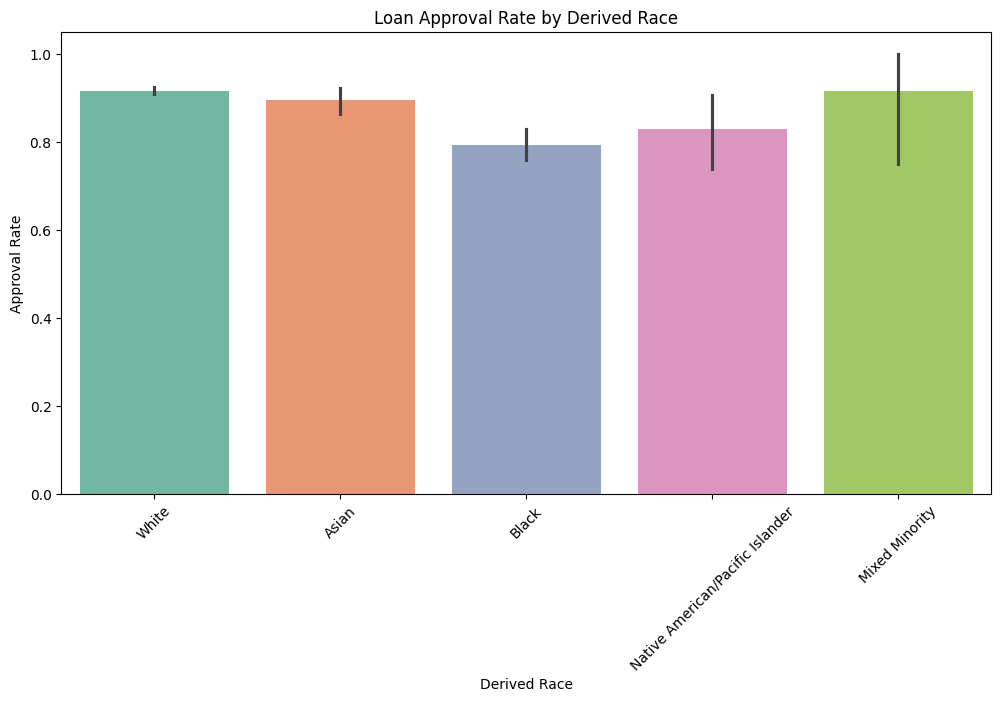

In [183]:
# Calculate the approval rate for each race
approval_rate_by_race = df.groupby("derived_race")["was_approved"].mean()
print(approval_rate_by_race)

# Bar plot of loan approval rates by race
plt.figure(figsize=(12, 6))
sns.barplot(data=df, x="derived_race", y="was_approved", palette="Set2")
plt.xlabel("Derived Race")
plt.ylabel("Approval Rate")
plt.title("Loan Approval Rate by Derived Race")
plt.xticks(rotation=45)
plt.show()